# Útulek

Mám dva datasety z útulku ve městě Austin:

- [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) - přijatá zvířata do útulku mezi 1. 10. 2013 a 6. 10. 2024
- [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) - zvířata, která útulek opustila mezi 1. 10. 2013 a 6. 10. 2024

Data si připravím, projdu jednotlivé příznaky. Vybrané příznaky popíšu pomocí univariačních a bivariačních deskriptivních statistik. Dále zodpovím různé otázky.

# Příprava dat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
%matplotlib inline 
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200

In [2]:
# Načtení dat, odstranění duplicit
intakes = pd.read_csv('intakes.csv', delimiter=',').drop_duplicates()
outcomes = pd.read_csv('outcomes.csv', delimiter=',').drop_duplicates()

Po načtení dat jsem rovnou odstranil duplicitní záznamy.

## Dataset *intakes*

In [3]:
display(intakes.head())
intakes.info()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167524 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167524 non-null  object
 1   Name              119311 non-null  object
 2   DateTime          167524 non-null  object
 3   MonthYear         167524 non-null  object
 4   Found Location    167524 non-null  object
 5   Intake Type       167524 non-null  object
 6   Intake Condition  167524 non-null  object
 7   Animal Type       167524 non-null  object
 8   Sex upon Intake   167522 non-null  object
 9   Age upon Intake   167523 non-null  object
 10  Breed             167524 non-null  object
 11  Color             167524 non-null  object
dtypes: object(12)
memory usage: 16.6+ MB


Vidím, že dataset *intakes* obsahuje 12 příznaků, všechny typu `object`, a 167524 záznamů. `NaN` hodnoty jsou pouze ve sloupcích *Name*, *Sex upon Intake* a *Age upon Intake*, ale je možné, že v ostatních sloupcích jsou null hodnoty reprezentovány jiným způsobem. Podíváme se na jednotlivé příznaky.

### Příznak *Animal ID*

In [4]:
print("Unikátních ID:", intakes["Animal ID"].nunique())

Unikátních ID: 150561


Sloupec *Animal ID* obsahuje ID každého zvířete. Jelikož neobsahuje `NaN` hodnoty a vyskytuje se v něm 150561 unikátních hodnot, což je méně než celkový počet záznamů, byla nějaká zvířata přijata do útulku vícekrát.

### Příznak *Name*

Tento příznak zřejmě obsahuje jména zvířat, která byla přijata do útulku.

### Příznaky *DateTime* a *MonthYear*

Tyto dva příznaky nesou stejnou informaci, a to čas, kdy bylo zvíře přijato do útulku. V případě *DateTime* se jedná o datum a čas, ve sloupci *MonthYear* je pouze měsíc a rok.

Příznak *DateTime* převedu na datový typ `datetime64`.

In [5]:
intakes["DateTime"] = pd.to_datetime(intakes["DateTime"], format='%m/%d/%Y %I:%M:%S %p')
display(intakes.head())
intakes.info()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,2022-05-12 00:23:00,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167524 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167524 non-null  object        
 1   Name              119311 non-null  object        
 2   DateTime          167524 non-null  datetime64[ns]
 3   MonthYear         167524 non-null  object        
 4   Found Location    167524 non-null  object        
 5   Intake Type       167524 non-null  object        
 6   Intake Condition  167524 non-null  object        
 7   Animal Type       167524 non-null  object        
 8   Sex upon Intake   167522 non-null  object        
 9   Age upon Intake   167523 non-null  object        
 10  Breed             167524 non-null  object        
 11  Color             167524 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 16.6+ MB


### Příznak *Found Location*

Tento příznak obsahuje místo, kde bylo zvíře nalezeno. V některých případech je známé pouze město, v jiných i adresa.

### Příznak *Intake Type*

In [6]:
print("Počet unikátních hodnot:", intakes["Intake Type"].nunique())
intakes["Intake Type"].unique()

Počet unikátních hodnot: 6


array(['Stray', 'Public Assist', 'Owner Surrender', 'Abandoned',
       'Wildlife', 'Euthanasia Request'], dtype=object)

Příznak *Intake Type* obsahuje informaci o tom, z jakého důvodu se zvíře dostalo do útulku. Jedná se o kategorický nominální příznak, který nabývá následujících šesti hodnot:

- Stray - zatoulaná zvířata
- Public Assist - pomoc veřejnosti, někdo např. našel zvíře a odevzdal ho do útulku
- Owner Surrender - majitel přinesl zvíře do útulku sám
- Abandoned - opuštěná zvířata
- Wildlife - divoká zvířata
- Euthanasia Request - majitel požádal o eutanazii

Jelikož jde o kategorický příznak, převedu ho na typ `category`.

In [7]:
intakes["Intake Type"] = intakes["Intake Type"].astype("category")
display(intakes["Intake Type"].dtype)

CategoricalDtype(categories=['Abandoned', 'Euthanasia Request', 'Owner Surrender',
                  'Public Assist', 'Stray', 'Wildlife'],
, ordered=False)

### Příznak *Intake Condition*

In [8]:
print("Počet unikátních hodnot:", intakes["Intake Condition"].nunique())
intakes["Intake Condition"].unique()

Počet unikátních hodnot: 20


array(['Normal', 'Sick', 'Injured', 'Pregnant', 'Neonatal', 'Nursing',
       'Aged', 'Unknown', 'Med Attn', 'Medical', 'Other', 'Feral',
       'Behavior', 'Med Urgent', 'Parvo', 'Space', 'Agonal', 'Neurologic',
       'Panleuk', 'Congenital'], dtype=object)

Jedná se o další kategorický nominální příznak, tento nám ale říká stav zvířete při přijetí do útulku a nabývá dvaceti hodnot, za zmínku stojí např.:

- Normal - zvíře je v pořádku
- Sick - nemocné zvíře
- Injured - zraněné zvíře
- Pregnant - těhotné zvíře
- Neonatal - novorozené zvíře

I tento příznak převedu na typ `category`.

In [9]:
intakes["Intake Condition"] = intakes["Intake Condition"].astype("category")
display(intakes["Intake Condition"].dtype)

CategoricalDtype(categories=['Aged', 'Agonal', 'Behavior', 'Congenital', 'Feral',
                  'Injured', 'Med Attn', 'Med Urgent', 'Medical', 'Neonatal',
                  'Neurologic', 'Normal', 'Nursing', 'Other', 'Panleuk',
                  'Parvo', 'Pregnant', 'Sick', 'Space', 'Unknown'],
, ordered=False)

### Příznak *Animal Type*

In [10]:
print("Počet unikátních hodnot:", intakes["Animal Type"].nunique())
intakes["Animal Type"].unique()

Počet unikátních hodnot: 5


array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

Opět se jedná o kategorický nominální příznak. Tento nabývá pěti hodnot a obsahuje druh zvířete.

- Dog - pes
- Cat - kočka
- Bird - pták
- Livestock - hospodářské zvíře
- Other - jiné

I tento příznak převedu na typ `category`.

In [11]:
intakes["Animal Type"] = intakes["Animal Type"].astype("category")
display(intakes["Animal Type"].dtype)

CategoricalDtype(categories=['Bird', 'Cat', 'Dog', 'Livestock', 'Other'], ordered=False)

### Příznak *Sex upon Intake*

In [12]:
print("Počet unikátních hodnot:", intakes["Sex upon Intake"].nunique())
intakes["Sex upon Intake"].unique()

Počet unikátních hodnot: 5


array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

*Sex upon Intake* je další kategorický nominální příznak, nabývá jedné z pěti hodnot nebo `NaN`.

- Neuterd Male - vykastrovaný samec
- Spayed Female - vykastrovaná samice
- Intact Male - nekastrovaný samec
- Intact Female - nekastrovaná samice
- Unknown - neznámé

Chybějící hodnoty nahradím hodnotou Unknown a příznak přetypuji na `category`.

In [13]:
intakes["Sex upon Intake"] = intakes["Sex upon Intake"].fillna("Unknown").astype("category")
display(intakes["Sex upon Intake"].dtype)

CategoricalDtype(categories=['Intact Female', 'Intact Male', 'Neutered Male',
                  'Spayed Female', 'Unknown'],
, ordered=False)

### Příznak *Age upon Intake*

In [14]:
print("Počet unikátních hodnot:", intakes["Age upon Intake"].nunique())
intakes["Age upon Intake"].unique()

Počet unikátních hodnot: 55


array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '1 month', '14 years', '2 weeks', '1 week',
       '2 months', '18 years', '9 years', '4 months', '1 day', '1 year',
       '3 years', '4 days', '5 years', '15 years', '8 months', '6 days',
       '7 years', '3 months', '3 weeks', '12 years', '9 months',
       '10 years', '10 months', '7 months', '0 years', '1 weeks',
       '5 days', '17 years', '2 days', '11 years', '3 days', '13 years',
       '5 weeks', '16 years', '19 years', '20 years', '-1 years',
       '-3 years', '22 years', '-4 years', '28 years', nan, '23 years',
       '30 years', '-2 years', '21 years', '25 years', '24 years'],
      dtype=object)

Příznak *Age upon Intake* reprezentuje věk zvířete při přijetí a nabývá `NaN` nebo jedné z 55 hodnot, které se skládají ze dvou částí - čísla a jednotky času (dny, týdny, měsíce, roky). Vidím, že některá zvířata mají záporný věk, ten nahradím hodnotou `NaN`. Příznak přetypuji na `Int64` s věkem ve dnech. Budu uvažovat, že měsíc má 30 dní a rok 365 dní. Kromě toho vytvořím nový příznak *AgeIntakeYears*, který bude také typu `Int64`, ale bude obsahovat věk zvířat v letech.

In [15]:
# Converts age from "[number] [unit]" to days
def convert_age(age):
    if pd.isna(age):
        return np.nan
    duration, unit = age.split()
    duration = int(duration)
    if duration < 0:
        return np.nan
    if unit in ("day", "days"):
        return duration
    if unit in ("week", "weeks"):
        return duration * 7
    if unit in ("month", "months"):
        return duration * 30
    if unit in ("year", "years"):
        return duration * 365
    raise ValueError(str(unit) + " is an invalid time unit")

def days_to_years(age):
    if pd.isna(age):
        return np.nan
    return age // 365

intakes["Age upon Intake"] = intakes["Age upon Intake"].apply(convert_age).astype("Int64")
intakes["AgeIntakeYears"] = intakes["Age upon Intake"].apply(days_to_years).astype("Int64")
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167524 entries, 0 to 167555
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167524 non-null  object        
 1   Name              119311 non-null  object        
 2   DateTime          167524 non-null  datetime64[ns]
 3   MonthYear         167524 non-null  object        
 4   Found Location    167524 non-null  object        
 5   Intake Type       167524 non-null  category      
 6   Intake Condition  167524 non-null  category      
 7   Animal Type       167524 non-null  category      
 8   Sex upon Intake   167524 non-null  category      
 9   Age upon Intake   167514 non-null  Int64         
 10  Breed             167524 non-null  object        
 11  Color             167524 non-null  object        
 12  AgeIntakeYears    167514 non-null  Int64         
dtypes: Int64(2), category(4), datetime64[ns](1), object(6)
memo

In [16]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,AgeIntakeYears
0,A786884,*Brock,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,730,Beagle Mix,Tricolor,2
1,A706918,Belle,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,2920,English Springer Spaniel,White/Liver,8
2,A724273,Runster,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,330,Basenji Mix,Sable/White,0
3,A665644,NaN,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,28,Domestic Shorthair Mix,Calico,0
4,A857105,Johnny Ringo,2022-05-12 00:23:00,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,730,Domestic Shorthair,Orange Tabby,2


### Příznak *Breed*

In [17]:
print("Počet unikátních hodnot:", intakes["Breed"].nunique())
intakes["Breed"].unique()

Počet unikátních hodnot: 2966


array(['Beagle Mix', 'English Springer Spaniel', 'Basenji Mix', ...,
       'Tosa', 'Toy Poodle/Standard Schnauzer',
       'Brittany/Australian Shepherd'], dtype=object)

*Breed* je další kategorický nominální příznak. Vyjadřuje plemeno zvířete a nabývá 2966 hodnot.

Opět ho převedu na typ `category`.

In [18]:
intakes["Breed"] = intakes["Breed"].astype("category")
display(intakes["Breed"].dtype)

CategoricalDtype(categories=['Abyssinian', 'Abyssinian Mix', 'Affenpinscher',
                  'Affenpinscher Mix', 'Afghan Hound Mix',
                  'Afghan Hound/German Shepherd',
                  'Afghan Hound/Labrador Retriever', 'African Mix',
                  'Airedale Terrier', 'Airedale Terrier Mix',
                  ...
                  'Yorkshire Terrier/Pomeranian',
                  'Yorkshire Terrier/Rat Terrier',
                  'Yorkshire Terrier/Scottish Terrier',
                  'Yorkshire Terrier/Shih Tzu', 'Yorkshire Terrier/Silkie',
                  'Yorkshire Terrier/Soft Coated Wheaten Terrier',
                  'Yorkshire Terrier/Standard Poodle',
                  'Yorkshire Terrier/Standard Schnauzer',
                  'Yorkshire Terrier/Toy Poodle',
                  'Yorkshire Terrier/Yorkshire Terrier'],
, ordered=False)

### Příznak *Color*

In [19]:
print("Počet unikátních hodnot:", intakes["Color"].nunique())
intakes["Color"].unique()[:20]

Počet unikátních hodnot: 650


array(['Tricolor', 'White/Liver', 'Sable/White', 'Calico', 'Orange Tabby',
       'Tan/Gray', 'Chocolate', 'Black', 'Brown Tabby', 'Black/White',
       'Cream Tabby', 'White/Tan', 'Brown/White', 'Brown Tabby/White',
       'Brown Brindle/White', 'Torbie', 'Tan/White', 'Tortie',
       'Blue/White', 'White/Brown'], dtype=object)

Jedná se o poslední kategorický nominální příznak a zároveň o poslední příznak vůbec. Říká nám, jaká je barva zvířete.

Také ho přetypuji na `category`.

In [20]:
intakes["Color"] = intakes["Color"].astype("category")
display(intakes["Color"].dtype)

CategoricalDtype(categories=['Agouti', 'Agouti/Brown Tabby', 'Agouti/Cream',
                  'Agouti/Gray', 'Agouti/White', 'Apricot', 'Apricot/Brown',
                  'Apricot/Tricolor', 'Apricot/White', 'Black',
                  ...
                  'Yellow/Brown', 'Yellow/Cream', 'Yellow/Gray',
                  'Yellow/Green', 'Yellow/Orange', 'Yellow/Orange Tabby',
                  'Yellow/Red', 'Yellow/Tan', 'Yellow/White', 'Yellow/Yellow'],
, ordered=False)

In [21]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167524 entries, 0 to 167555
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167524 non-null  object        
 1   Name              119311 non-null  object        
 2   DateTime          167524 non-null  datetime64[ns]
 3   MonthYear         167524 non-null  object        
 4   Found Location    167524 non-null  object        
 5   Intake Type       167524 non-null  category      
 6   Intake Condition  167524 non-null  category      
 7   Animal Type       167524 non-null  category      
 8   Sex upon Intake   167524 non-null  category      
 9   Age upon Intake   167514 non-null  Int64         
 10  Breed             167524 non-null  category      
 11  Color             167524 non-null  category      
 12  AgeIntakeYears    167514 non-null  Int64         
dtypes: Int64(2), category(6), datetime64[ns](1), object(4)
memo

Zpracoval jsem všechny příznaky, tím mám hotovou přípravu prvního datasetu a můžu se pustit na druhý.

## Dataset *outcomes*

In [22]:
display(outcomes.head())
outcomes.info()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167535 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167535 non-null  object
 1   Name              119457 non-null  object
 2   DateTime          167535 non-null  object
 3   MonthYear         167535 non-null  object
 4   Date of Birth     167535 non-null  object
 5   Outcome Type      167491 non-null  object
 6   Outcome Subtype   76957 non-null   object
 7   Animal Type       167535 non-null  object
 8   Sex upon Outcome  167532 non-null  object
 9   Age upon Outcome  167488 non-null  object
 10  Breed             167535 non-null  object
 11  Color             167535 non-null  object
dtypes: object(12)
memory usage: 16.6+ MB


Dataset *outcomes* obsahuje 12 příznaků, všechny typu `object`, a 167535 záznamů. `NaN` hodnoty jsou ve sloupcích *Name*, *Outcome Type*, *Outcome Subtype*, *Sex upon Outcome* a *Age upon Outcome*. Podívejme se na jednotlivé příznaky, některé jsou, zdá se, stejné jako v datasetu *intakes*.

### Příznak *Animal ID*

In [23]:
print("Unikátních ID:", outcomes["Animal ID"].nunique())

Unikátních ID: 150558


Stejně jako v případě prvního datasetu je i zde příznak *Animal ID*. Ve sloupci nejsou `NaN` hodnoty a unikátních hodnot je méně než je celkový počet záznamů, takže některá zvířata z útulku odešla vícekrát.

### Příznak *Name*

Tento příznak obsahuje jména zvířat, která opustila útulek.

### Příznaky *DateTime a MonthYear*

Podobně jako v prvním datasetu nesou tyto dva příznaky stejnou informaci. Tentokrát se ale jedná o datum a čas odchodu zvířat z útulku.

I zde přetypuji *DateTime* na `datetime64`.

In [24]:
outcomes["DateTime"] = pd.to_datetime(outcomes["DateTime"], format='%m/%d/%Y %I:%M:%S %p')
display(outcomes.head())
outcomes.info()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,2023-07-01 18:12:00,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,2020-08-16 11:38:00,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167535 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167535 non-null  object        
 1   Name              119457 non-null  object        
 2   DateTime          167535 non-null  datetime64[ns]
 3   MonthYear         167535 non-null  object        
 4   Date of Birth     167535 non-null  object        
 5   Outcome Type      167491 non-null  object        
 6   Outcome Subtype   76957 non-null   object        
 7   Animal Type       167535 non-null  object        
 8   Sex upon Outcome  167532 non-null  object        
 9   Age upon Outcome  167488 non-null  object        
 10  Breed             167535 non-null  object        
 11  Color             167535 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 16.6+ MB


### Příznak *Date of Birth*

In [25]:
print("Počet unikátních hodnot:", outcomes["Date of Birth"].nunique())
outcomes["Date of Birth"].unique()

Počet unikátních hodnot: 8486


array(['03/25/2023', '05/02/2017', '07/12/2017', ..., '09/01/2024',
       '10/02/2024', '08/03/2024'], dtype=object)

Příznak *Date of Birth* obsahuje datum narození zvířat, nabývá 8486 hodnot.

Přetypuji ho na `datetime64`.

In [26]:
outcomes["Date of Birth"] = pd.to_datetime(outcomes['Date of Birth'], format='%m/%d/%Y')
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167535 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167535 non-null  object        
 1   Name              119457 non-null  object        
 2   DateTime          167535 non-null  datetime64[ns]
 3   MonthYear         167535 non-null  object        
 4   Date of Birth     167535 non-null  datetime64[ns]
 5   Outcome Type      167491 non-null  object        
 6   Outcome Subtype   76957 non-null   object        
 7   Animal Type       167535 non-null  object        
 8   Sex upon Outcome  167532 non-null  object        
 9   Age upon Outcome  167488 non-null  object        
 10  Breed             167535 non-null  object        
 11  Color             167535 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 16.6+ MB


### Příznak *Outcome Type*

In [27]:
print("Počet unikátních hodnot:", outcomes["Outcome Type"].nunique())
outcomes["Outcome Type"].unique()

Počet unikátních hodnot: 11


array(['Adoption', 'Rto-Adopt', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', nan, 'Relocate',
       'Stolen', 'Lost'], dtype=object)

Příznak *Outcome Type* nám říká, jakým způsobem zvíře opustilo útulek. Nabývá hodnoty `NaN`, nebo jedné z 11 kategorií, např.:

- Adoption - adoptováno
- Euthanasia - usmrceno
- Transfer - převezeno do jiného útulku
- Return to Owner - vráceno majiteli
- Died - zemřelo

Jelikož jde o kategorický příznak, přetypuji ho na `category`. Pro `NaN` hodnoty vytvořím novou kategorii Unknown.

In [28]:
outcomes["Outcome Type"] = outcomes["Outcome Type"].fillna("Unknown").astype("category")
outcomes["Outcome Type"].dtype

CategoricalDtype(categories=['Adoption', 'Died', 'Disposal', 'Euthanasia', 'Lost',
                  'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt',
                  'Stolen', 'Transfer', 'Unknown'],
, ordered=False)

### Příznak *Outcome Subtype*

In [29]:
print("Počet unikátních hodnot:", outcomes["Outcome Subtype"].nunique())
display(outcomes["Outcome Subtype"].unique())
outcomes[(~ outcomes["Outcome Subtype"].isna())].loc[:,["Outcome Type", "Outcome Subtype"]].head(20)

Počet unikátních hodnot: 26


array([nan, 'Partner', 'Foster', 'Snr', 'SCRP', 'Out State', 'Suffering',
       'At Vet', 'Underage', 'Rabies Risk', 'In Kennel', 'Offsite',
       'Aggressive', 'Field', 'Emergency', 'Enroute', 'In Foster',
       'Behavior', 'Medical', 'Court/Investigation', 'Possible Theft',
       'Barn', 'Customer S', 'In State', 'Emer', 'In Surgery', 'Prc'],
      dtype=object)

,Outcome Type,Outcome Subtype
5,Transfer,Partner
7,Adoption,Foster
8,Adoption,Foster
13,Transfer,Snr
14,Transfer,SCRP
17,Transfer,Out State
18,Transfer,Partner
19,Transfer,Partner
21,Transfer,Partner
22,Euthanasia,Suffering


*Outcome Subtype* je další kategorický nominální příznak a doplňuje příznak *Outcome Type* o další informace. Např. nám říká, z jakého důvodu bylo zvíře usmrceno v případě, že hodnota *Outcome Type* je Euthanasia. Nabývá 26 hodnot nebo `NaN`.

Příznak převedu na typ `category`. `NaN` hodnoty zůstanou tam, kde jsou.

In [30]:
outcomes["Outcome Subtype"] = outcomes["Outcome Subtype"].astype("category")
outcomes["Outcome Subtype"].dtype

CategoricalDtype(categories=['Aggressive', 'At Vet', 'Barn', 'Behavior',
                  'Court/Investigation', 'Customer S', 'Emer', 'Emergency',
                  'Enroute', 'Field', 'Foster', 'In Foster', 'In Kennel',
                  'In State', 'In Surgery', 'Medical', 'Offsite', 'Out State',
                  'Partner', 'Possible Theft', 'Prc', 'Rabies Risk', 'SCRP',
                  'Snr', 'Suffering', 'Underage'],
, ordered=False)

### Příznak *Animal Type*

In [31]:
print("Počet unikátních hodnot:", outcomes["Animal Type"].nunique())
display(outcomes["Animal Type"].unique())

Počet unikátních hodnot: 5


array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

Příznak *Animal Type* je stejný jako v prvním datasetu, reprezentuje druh zvířete a nabývá 5 hodnot.

- Cat - kočka
- Dog - pes
- Bird - pták
- Livestock - hospodářské zvíře
- Other - jiné

Jde o kategorický nominální příznak, proto ho přetypuji na `category`.

In [32]:
outcomes["Animal Type"] = outcomes["Animal Type"].astype("category")
outcomes["Animal Type"].dtype

CategoricalDtype(categories=['Bird', 'Cat', 'Dog', 'Livestock', 'Other'], ordered=False)

### Příznak *Sex upon Outcome*

In [33]:
print("Počet unikátních hodnot:", outcomes["Sex upon Outcome"].nunique())
display(outcomes["Sex upon Outcome"].unique())

Počet unikátních hodnot: 5


array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female', nan], dtype=object)

Jde o ekvivalent příznaku *Sex upon Intake* z prvního datasetu. Tedy informace o pohlaví a kastraci zvířete, nabývá jedné z 5 hodnot nebo `NaN`.

- Neuterd Male - vykastrovaný samec
- Spayed Female - vykastrovaná samice
- Intact Male - nekastrovaný samec
- Intact Female - nekastrovaná samice
- Unknown - neznámé

`NaN` hodnoty nahradím hodnotou Unknown a poté příznak přetypuji na `category`, protože je kategorický.

In [34]:
outcomes["Sex upon Outcome"] = outcomes["Sex upon Outcome"].fillna("Unknown").astype("category")
outcomes["Sex upon Outcome"].dtype

CategoricalDtype(categories=['Intact Female', 'Intact Male', 'Neutered Male',
                  'Spayed Female', 'Unknown'],
, ordered=False)

### Příznak *Age upon Outcome*

In [35]:
print("Počet unikátních hodnot:", outcomes["Age upon Outcome"].nunique())
outcomes["Age upon Outcome"].unique()

Počet unikátních hodnot: 55


array(['3 months', '2 years', '1 year', '4 months', '6 days', '7 years',
       '2 months', '3 years', '2 days', '3 weeks', '11 years', '9 months',
       '4 weeks', '2 weeks', '6 months', '9 years', '10 years', '1 month',
       '8 years', '7 months', '6 years', '4 years', '12 years', '5 years',
       '1 day', '1 weeks', '5 months', '5 days', '15 years', '10 months',
       '4 days', '16 years', '8 months', nan, '13 years', '1 week',
       '14 years', '11 months', '3 days', '0 years', '5 weeks',
       '17 years', '18 years', '20 years', '22 years', '-2 years',
       '19 years', '28 years', '-3 years', '23 years', '25 years',
       '30 years', '-1 years', '24 years', '21 years', '-4 years'],
      dtype=object)

Příznak *Age upon Outcome* nám říká věk zvířete v době, co opustilo útulek. I zde je každý záznam ve formátu čísla a jednotky času. Stejně jako v prvním datasetu záporný věk nahradím hodnotou `NaN` a příznak přetypuji na `Int64` reprezentující věk ve dnech. Také vytvořím nový příznak *AgeOutcomeYears* typu `Int64` s věkem v letech.

In [36]:
outcomes["Age upon Outcome"] = outcomes["Age upon Outcome"].apply(convert_age).astype("Int64")
outcomes["AgeOutcomeYears"] = outcomes["Age upon Outcome"].apply(days_to_years).astype("Int64")
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167535 entries, 0 to 167558
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167535 non-null  object        
 1   Name              119457 non-null  object        
 2   DateTime          167535 non-null  datetime64[ns]
 3   MonthYear         167535 non-null  object        
 4   Date of Birth     167535 non-null  datetime64[ns]
 5   Outcome Type      167535 non-null  category      
 6   Outcome Subtype   76957 non-null   category      
 7   Animal Type       167535 non-null  category      
 8   Sex upon Outcome  167535 non-null  category      
 9   Age upon Outcome  167479 non-null  Int64         
 10  Breed             167535 non-null  object        
 11  Color             167535 non-null  object        
 12  AgeOutcomeYears   167479 non-null  Int64         
dtypes: Int64(2), category(4), datetime64[ns](2), object(5)
memo

### Příznak *Breed*

In [37]:
print("Počet unikátních hodnot:", outcomes["Breed"].nunique())
outcomes["Breed"].unique()

Počet unikátních hodnot: 2964


array(['Domestic Shorthair Mix', 'Chihuahua Shorthair Mix', 'Raccoon',
       ..., 'Lhasa Apso/Standard Poodle',
       'Dachshund Wirehair/Bruss Griffon', 'Miniature Schnauzer/Beagle'],
      dtype=object)

*Breed* je dalším příznakem, který je v obou datasetech. Obsahuje informaci o plemeni zvířete a nabývá 2964 hodnot.

Je to kategorický nominální příznak, proto ho přetypuji na `category`.

In [38]:
outcomes["Breed"] = outcomes["Breed"].astype("category")
outcomes["Breed"].dtype

CategoricalDtype(categories=['Abyssinian', 'Abyssinian Mix', 'Affenpinscher',
                  'Affenpinscher Mix', 'Afghan Hound Mix',
                  'Afghan Hound/German Shepherd',
                  'Afghan Hound/Labrador Retriever', 'African Mix',
                  'Airedale Terrier', 'Airedale Terrier Mix',
                  ...
                  'Yorkshire Terrier/Pomeranian',
                  'Yorkshire Terrier/Rat Terrier',
                  'Yorkshire Terrier/Scottish Terrier',
                  'Yorkshire Terrier/Shih Tzu', 'Yorkshire Terrier/Silkie',
                  'Yorkshire Terrier/Soft Coated Wheaten Terrier',
                  'Yorkshire Terrier/Standard Poodle',
                  'Yorkshire Terrier/Standard Schnauzer',
                  'Yorkshire Terrier/Toy Poodle',
                  'Yorkshire Terrier/Yorkshire Terrier'],
, ordered=False)

### Příznak *Color*

In [39]:
print("Počet unikátních hodnot:", outcomes["Color"].nunique())
outcomes["Color"].unique()[:20]

Počet unikátních hodnot: 653


array(['Black/White', 'Brown Tabby/White', 'White/Brown', 'Gray', 'Buff',
       'Orange Tabby', 'Brown', 'Blue Tabby', 'Brown Tabby', 'Black',
       'White/Orange Tabby', 'Blue/White', 'White/Blue', 'Red/White',
       'Black/Gray', 'Torbie', 'Brown/Black', 'Lilac Point', 'Blue',
       'Calico'], dtype=object)

*Color* je posledním příznakem. Reprezentuje barvu zvířete.

Je to kategorický nominální příznak, takže ho přetypuji na `category`.

In [40]:
outcomes["Color"] = outcomes["Color"].astype("category")
outcomes["Color"].dtype

CategoricalDtype(categories=['Agouti', 'Agouti/Brown Tabby', 'Agouti/Cream',
                  'Agouti/Gray', 'Agouti/White', 'Apricot', 'Apricot/Brown',
                  'Apricot/Tricolor', 'Apricot/White', 'Black',
                  ...
                  'Yellow/Brown', 'Yellow/Cream', 'Yellow/Gray',
                  'Yellow/Green', 'Yellow/Orange', 'Yellow/Orange Tabby',
                  'Yellow/Red', 'Yellow/Tan', 'Yellow/White', 'Yellow/Yellow'],
, ordered=False)

In [41]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167535 entries, 0 to 167558
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167535 non-null  object        
 1   Name              119457 non-null  object        
 2   DateTime          167535 non-null  datetime64[ns]
 3   MonthYear         167535 non-null  object        
 4   Date of Birth     167535 non-null  datetime64[ns]
 5   Outcome Type      167535 non-null  category      
 6   Outcome Subtype   76957 non-null   category      
 7   Animal Type       167535 non-null  category      
 8   Sex upon Outcome  167535 non-null  category      
 9   Age upon Outcome  167479 non-null  Int64         
 10  Breed             167535 non-null  category      
 11  Color             167535 non-null  category      
 12  AgeOutcomeYears   167479 non-null  Int64         
dtypes: Int64(2), category(6), datetime64[ns](2), object(3)
memo

Teď je dokončena příprava obou datasetů a můžu se přesunout k deskriptivním statistikám.

# Deskriptivní statistiky

## *Age upon Intake* a *DateTime* z datasetu *intakes*

Nejprve se podíváme na věk zvířat. V grafech využiju mnou vytvořený nový příznak *AgeIntakeYears*. Věk zvířat v letech je pro nás přirozenější, než kdyby byl ve dnech.

,Age upon Intake [years],Age upon Intake [days]
Min,0.000000,0.000000
Max,30.000000,10950.000000
Average,1.846073,710.069803
25%,0.000000,60.000000
Median,1.000000,365.000000
75%,2.000000,730.000000


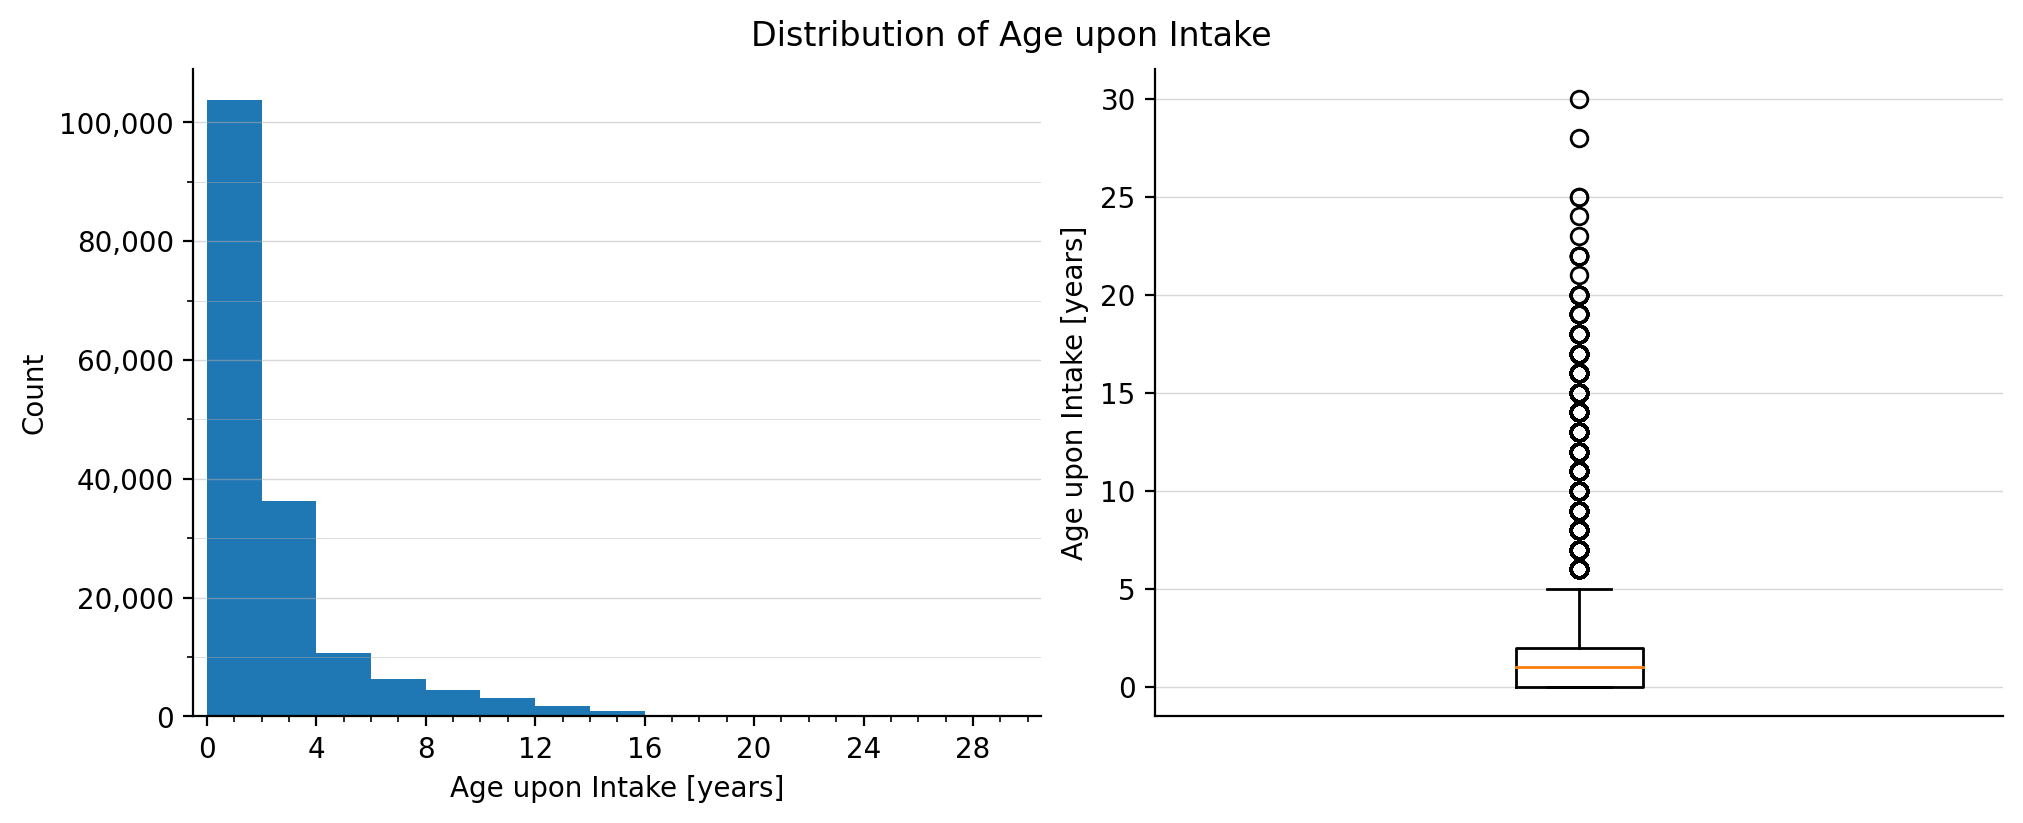

In [42]:
# Formats ints with comma between every digits
def format_with_commas(x, pos=0):
    return f"{int(x):,}"

# Returns dataframe with min, max, mean, lower quartile, median, upper quartile of given columns
def get_stats_df_numerical(df, columns, titles):
    dictionary = dict()
    for col, title in zip(columns, titles):
        dictionary[title] = [
            df[col].min(),
            df[col].max(),
            df[col].mean(),
            df[col].quantile(0.25),
            df[col].median(),
            df[col].quantile(0.75),
        ]
    return pd.DataFrame(dictionary, index=["Min", "Max", "Average", "25%", "Median", "75%"])

display(get_stats_df_numerical(intakes, ["AgeIntakeYears", "Age upon Intake"], ["Age upon Intake [years]", "Age upon Intake [days]"]))


fig = plt.figure(figsize=(10, 4), constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

fig.suptitle("Distribution of Age upon Intake")

# Histogram
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xlabel("Age upon Intake [years]")
ax1.set_ylabel("Count")
ax1.set_xlim(-0.5, 30.5)
ax1.set_xticks(range(0, 31, 4))
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10000))
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
ax1.grid(axis="y", alpha=0.5, linewidth=0.5)
ax1.grid(axis="y", which="minor", alpha=0.5, linewidth=0.3)
ax1.hist(intakes["AgeIntakeYears"].dropna(), bins=15)

# Boxplot
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.tick_params(axis="x", bottom=False, labelbottom=False)
ax2.set_ylabel("Age upon Intake [years]")
ax2.grid(axis="y", alpha=0.5, linewidth=0.5)
ax2.boxplot(intakes["AgeIntakeYears"].dropna());

In [43]:
intakes[(intakes["AgeIntakeYears"] == 30)][["Name", "Animal Type", "Breed", "AgeIntakeYears"]]

,Name,Animal Type,Breed,AgeIntakeYears
95428,Sunshine,Bird,Macaw,30


Z histogramu vidíme, že většina zvířat přišla do útulku ve věku méně než 4 roky. V tabulce se můžeme dočíst, že dolní kvartil jsou 2 měsíce a horní kvartil 2 roky. V tomto rozsahu je věk příchodu poloviny zvířat. Do útulku ale přišla i mnohem starší zvířata, to je vidět na boxplotu. Ten nám říká, že graf obsahuje poměrně hodně odlehlých hodnot. Nejmladší zvíře nebylo staré ani den, tedy se jedná o novorozence. Naopak nejstaršímu zvířeti bylo 30 let, jedná se o papouška aru jménem Sunshine.

Podívejme se i na příznak *DateTime*.

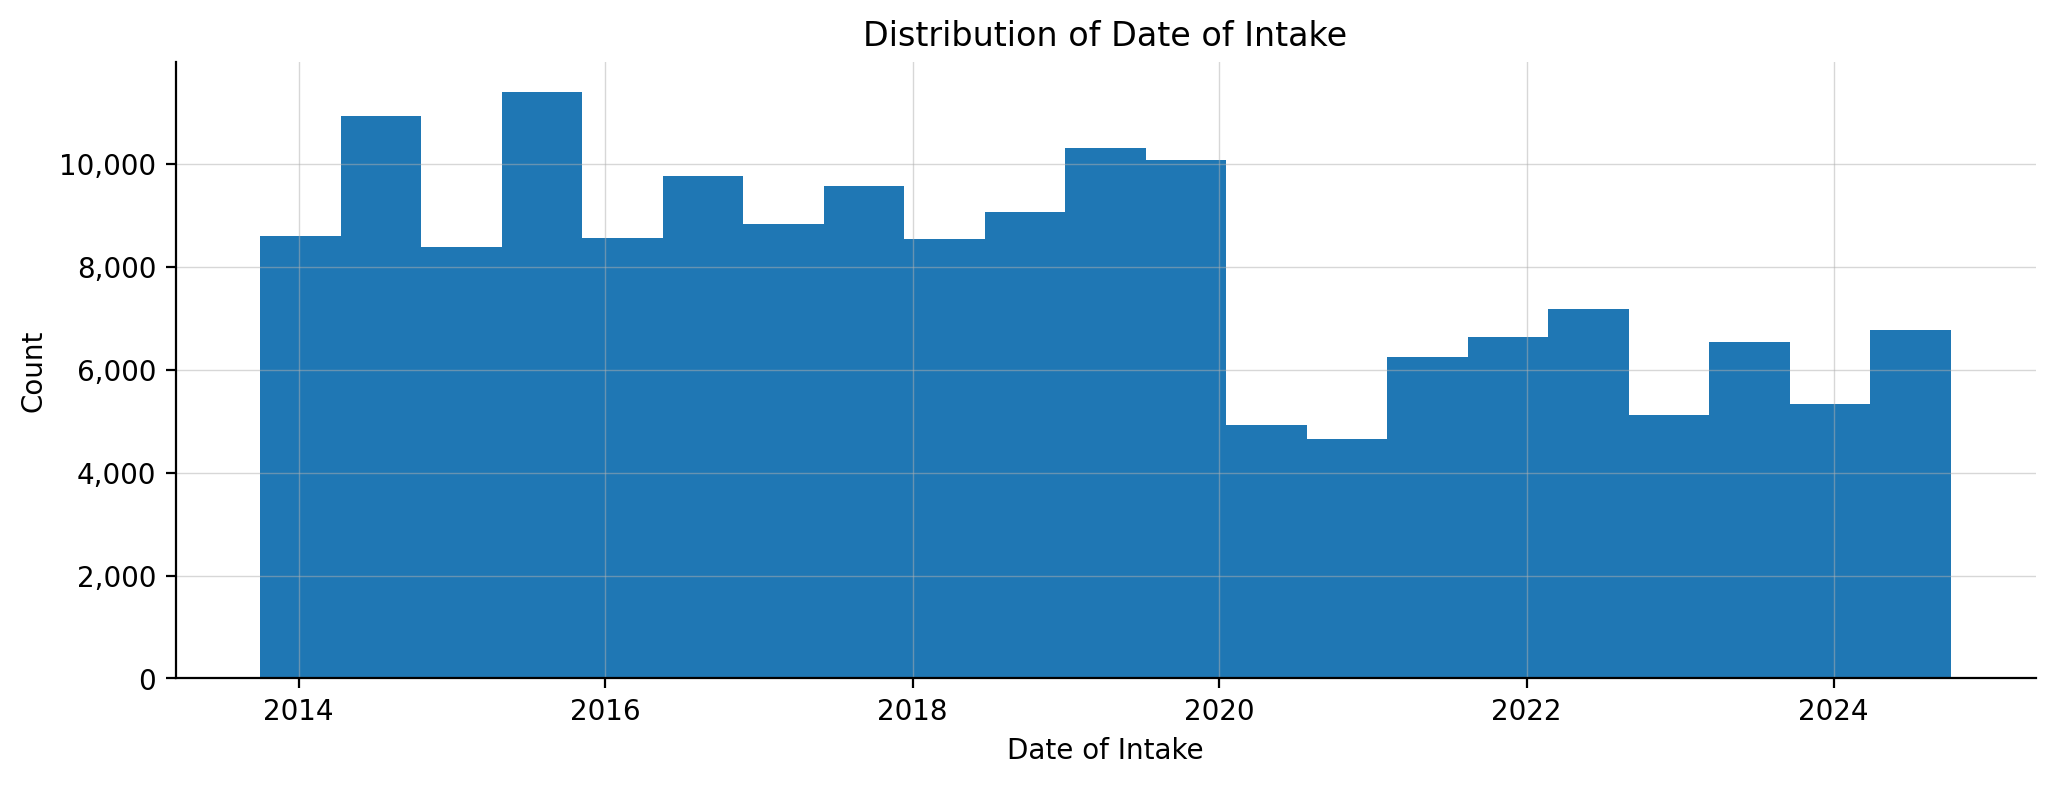

In [44]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Distribution of Date of Intake")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Date of Intake")
ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
ax.grid(axis="y", alpha=0.5, linewidth=0.5)
ax.grid(axis="x", alpha=0.5, linewidth=0.5)
ax.hist(intakes["DateTime"].dropna(), bins=21);

Vidíme, že útulek od roku 2020 začal přijímat znatelně méně zvířat. To by mohlo být způsobené kovidovou pandemií.

## Druhy zvířat v útulku

Podívejme se, jaké je rozložení druhů zvířat, která byla přijata do útulku. Zajímá nás příznak *Animal Type*.

,Frequency,Relative frequency
Dog,91631,0.546972
Cat,66350,0.396063
Other,8668,0.051742
Bird,845,0.005044
Livestock,30,0.000179


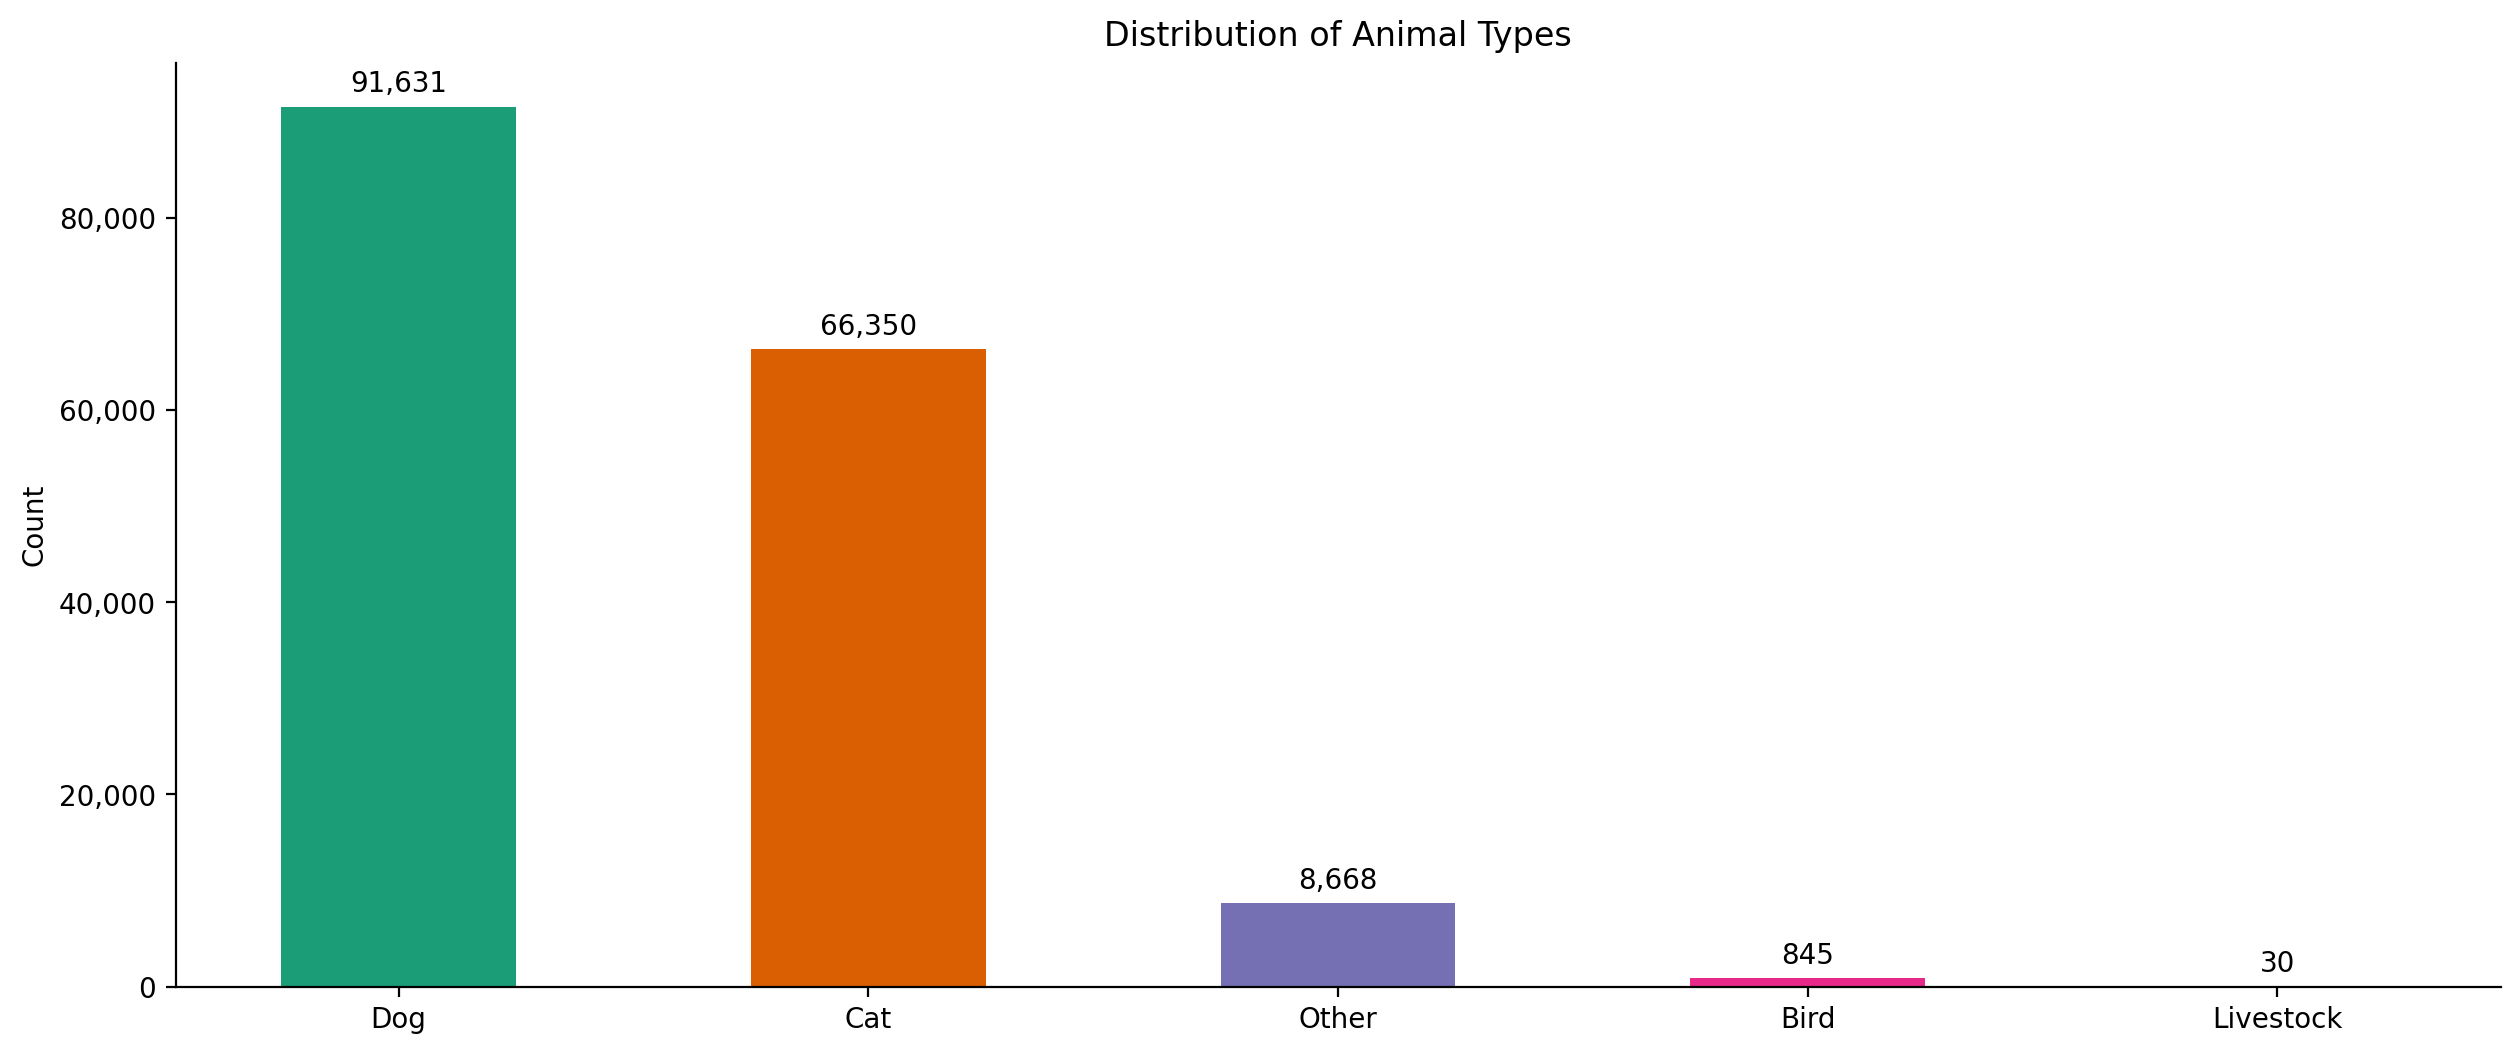

In [45]:
# Returns a dataframe with frequencies and relative frequencies of categories in the given column
def get_stats_df_categorical(df, col):
    dictionary = {
        "Frequency": df[col].value_counts(),
        "Relative frequency": df[col].value_counts(normalize=True),
    }
    return pd.DataFrame(dictionary)

display(get_stats_df_categorical(intakes, "Animal Type"))

animal_type_counts = intakes["Animal Type"].value_counts()
labels = [format_with_commas(x) for x in animal_type_counts]

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title("Distribution of Animal Types")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.bar(animal_type_counts.index, animal_type_counts, width=0.5, color=plt.cm.Dark2.colors)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
ax.set_ylabel("Count")
ax.bar_label(ax.containers[0], padding=3, labels=labels);

Vidíme, že více než polovina zvířat jsou psi a více než třetina kočky. Hospodářských zvířat je jen 30 a ptáků 845. Ostatních zvířat je 8668, jaká to ale mohou být zvířata? Na to nám odpoví příznak *Breed*. Podíváme se na nejčastějších 15 druhů zvířat typu Other.

,Other animals
No. of animals,8668
No. of breeds,137


,Frequency,Relative frequency
Bat,2234,0.257730
Bat Mix,1755,0.202469
Raccoon,789,0.091024
Raccoon Mix,539,0.062183
Guinea Pig,524,0.060452
Rabbit Sh Mix,342,0.039455
Rabbit Sh,288,0.033226
Opossum Mix,191,0.022035
Opossum,187,0.021574
Skunk,174,0.020074


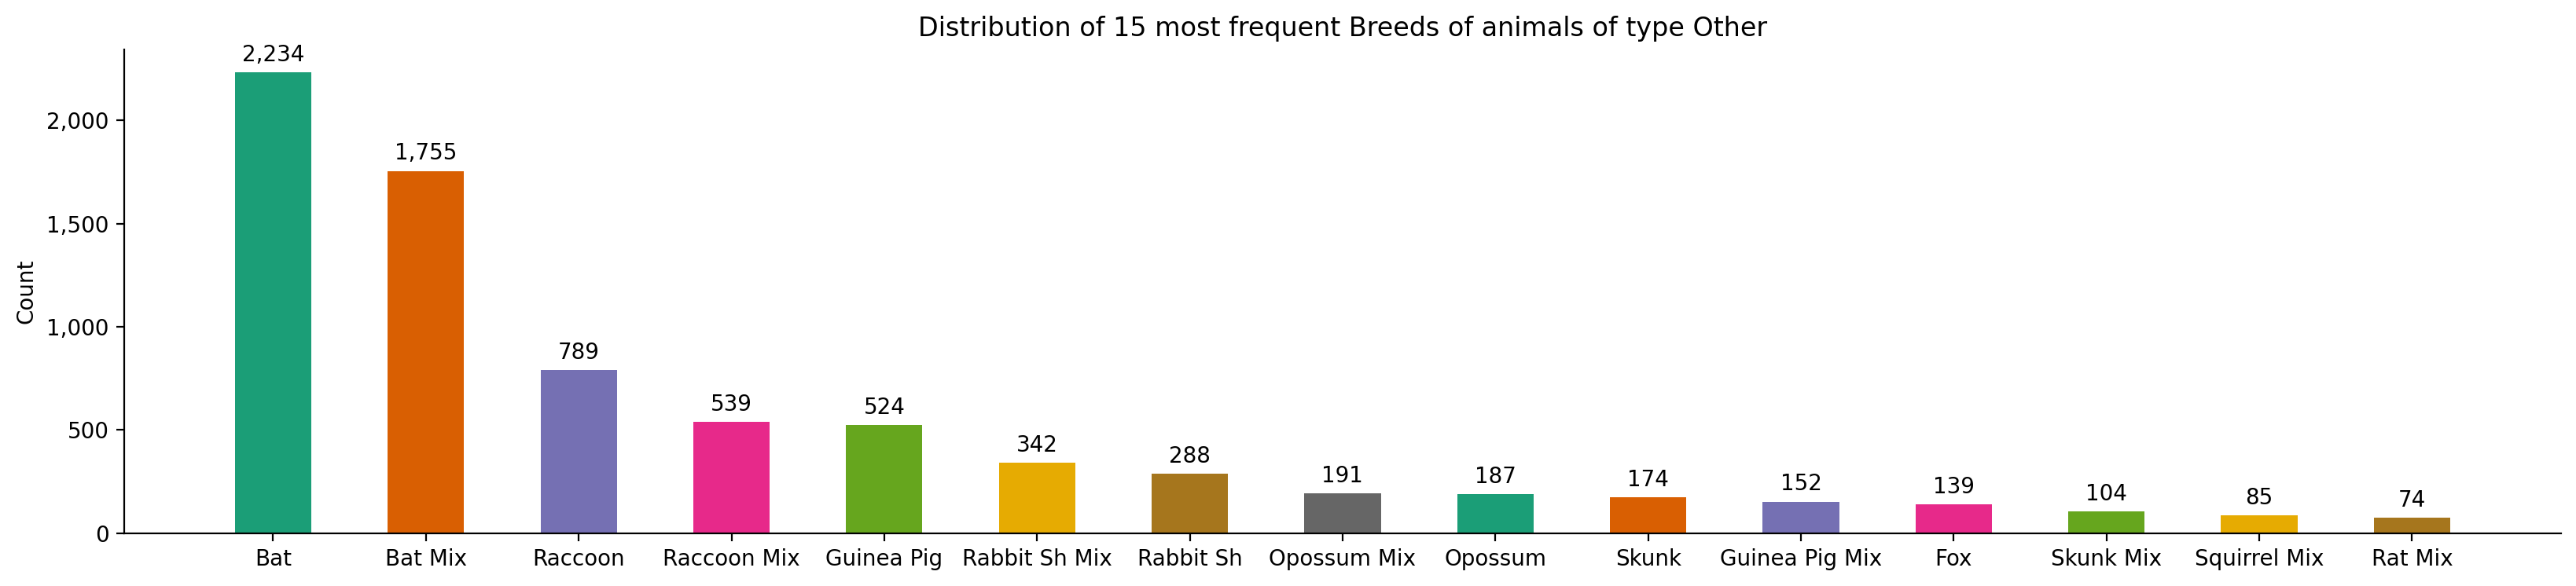

In [46]:
other_animals = intakes[intakes["Animal Type"] == "Other"].copy()
other_animals["Breed"] = other_animals["Breed"].cat.remove_unused_categories()

display(pd.DataFrame({"Other animals": [other_animals.shape[0], other_animals["Breed"].nunique()]}, index=["No. of animals", "No. of breeds"]))
display(get_stats_df_categorical(other_animals, "Breed").iloc[:15])

other_animals_counts = other_animals["Breed"].value_counts().iloc[:15]
labels = [format_with_commas(x) for x in other_animals_counts]

fig, ax = plt.subplots(figsize=(20, 4))
ax.set_title("Distribution of 15 most frequent Breeds of animals of type Other")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.bar(other_animals_counts.index, other_animals_counts, width=0.5, color=plt.cm.Dark2.colors)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
ax.set_ylabel("Count")
ax.bar_label(ax.containers[0], padding=3, labels=labels);

Z grafu a tabulky vidíme, že mezi další zvířata patří např. netopýři, mývali nebo lišky. Některé druhy zvířat jsou obsaženy se slovem "Mix", nejspíš se bude jednat o křížence.

## *Outcome Type*

Nyní se zaměřme na důvod odchodu zvířat z útulku.

Počet kategorií Outcome Type: 12


,Frequency,Relative frequency
Adoption,80714,0.481774
Transfer,47395,0.282896
Return to Owner,25199,0.150410
Euthanasia,10459,0.062429
Died,1583,0.009449
Rto-Adopt,1186,0.007079
Disposal,831,0.004960
Missing,89,0.000531
Unknown,44,0.000263
Relocate,27,0.000161


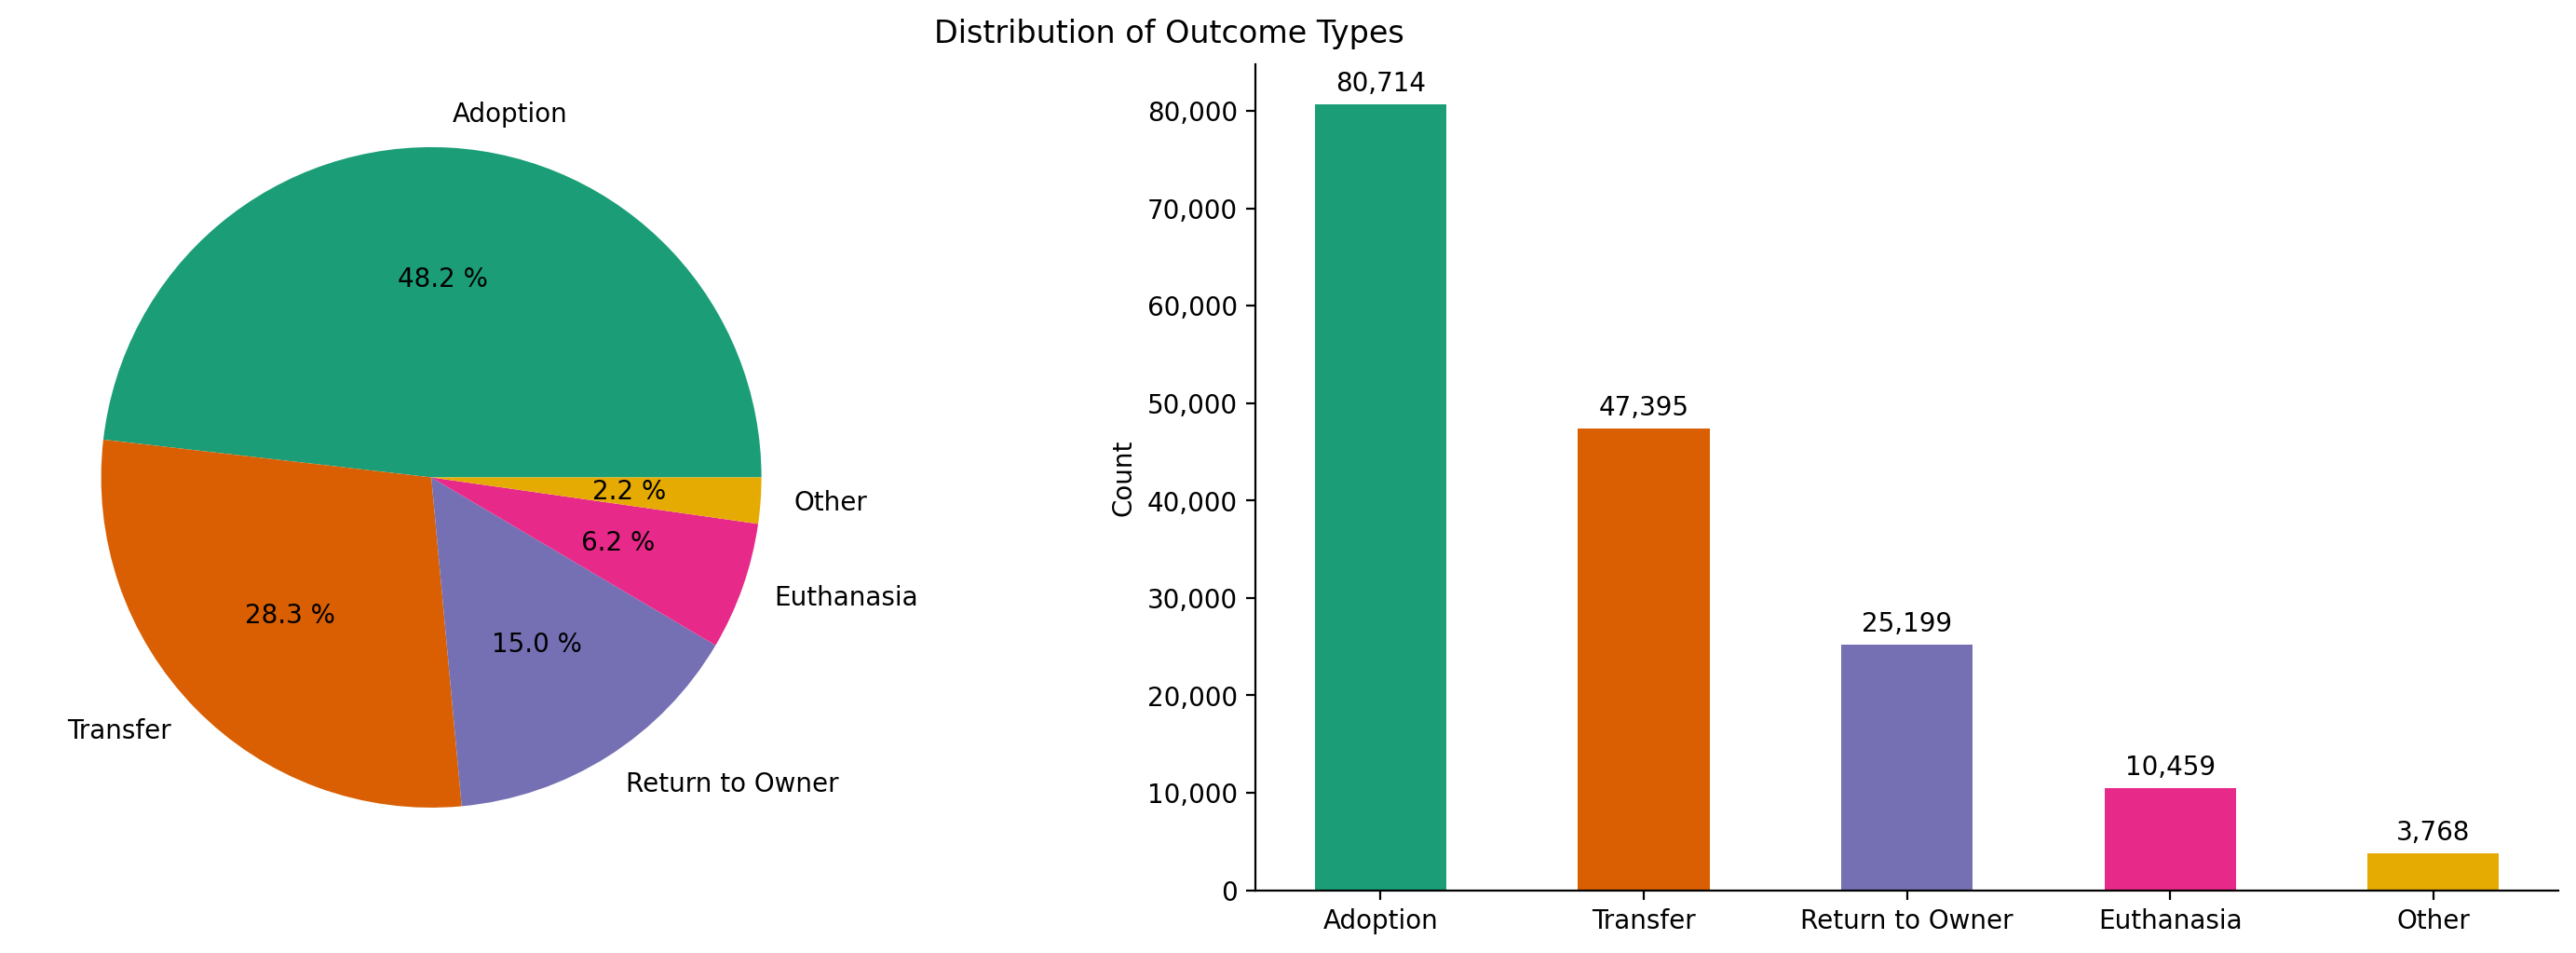

In [47]:
print("Počet kategorií Outcome Type:", outcomes["Outcome Type"].nunique())

display(get_stats_df_categorical(outcomes, "Outcome Type"))

outcome_type_counts = outcomes["Outcome Type"].value_counts()[:4]
other_outcome_type_counts = outcomes["Outcome Type"].value_counts()[4:].sum()
outcome_type_counts["Other"] = other_outcome_type_counts;
labels = [format_with_commas(x) for x in outcome_type_counts]
colors = list(plt.cm.Dark2.colors)
colors[4], colors[5] = colors[5], colors[4]

fig = plt.figure(figsize=(15, 5), constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.suptitle("Distribution of Outcome Types")

# Pie chart
ax1.pie(outcome_type_counts, labels=outcome_type_counts.index, autopct='%1.1f %%', colors=colors)

# Bar chart
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.bar(outcome_type_counts.index, outcome_type_counts, width=0.5, color=colors)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
ax2.set_ylabel("Count")
ax2.bar_label(ax2.containers[0], padding=3, labels=labels);

Existuje celkem 12 důvodů opuštění útulku. V grafech jsem vyobrazil čtyři nejčetnější a ostatní jsem spojil do jedné kategorie Other, protože se jedná o malé množství případů. Téměř polovina zvířat je adoptována a více než čtvrtina převezena do jiného útulku/zařízení. 15 % zvířat je vráceno majiteli a následuje eutanazie se 6.2 %. Do kategorie Other patří např. smrt nebo krádež zvířete.

## Pohlaví a kastrace

Podívejme se ještě na příznak *Sex upon Outcome*. Ten nám o zvířeti, které opouští útulek, říká jeho pohlaví, a zda bylo vykastrováno.

,Frequency,Relative frequency
Neutered Male,58688,0.350303
Spayed Female,53173,0.317384
Intact Male,21568,0.128737
Intact Female,21103,0.125962
Unknown,13003,0.077614


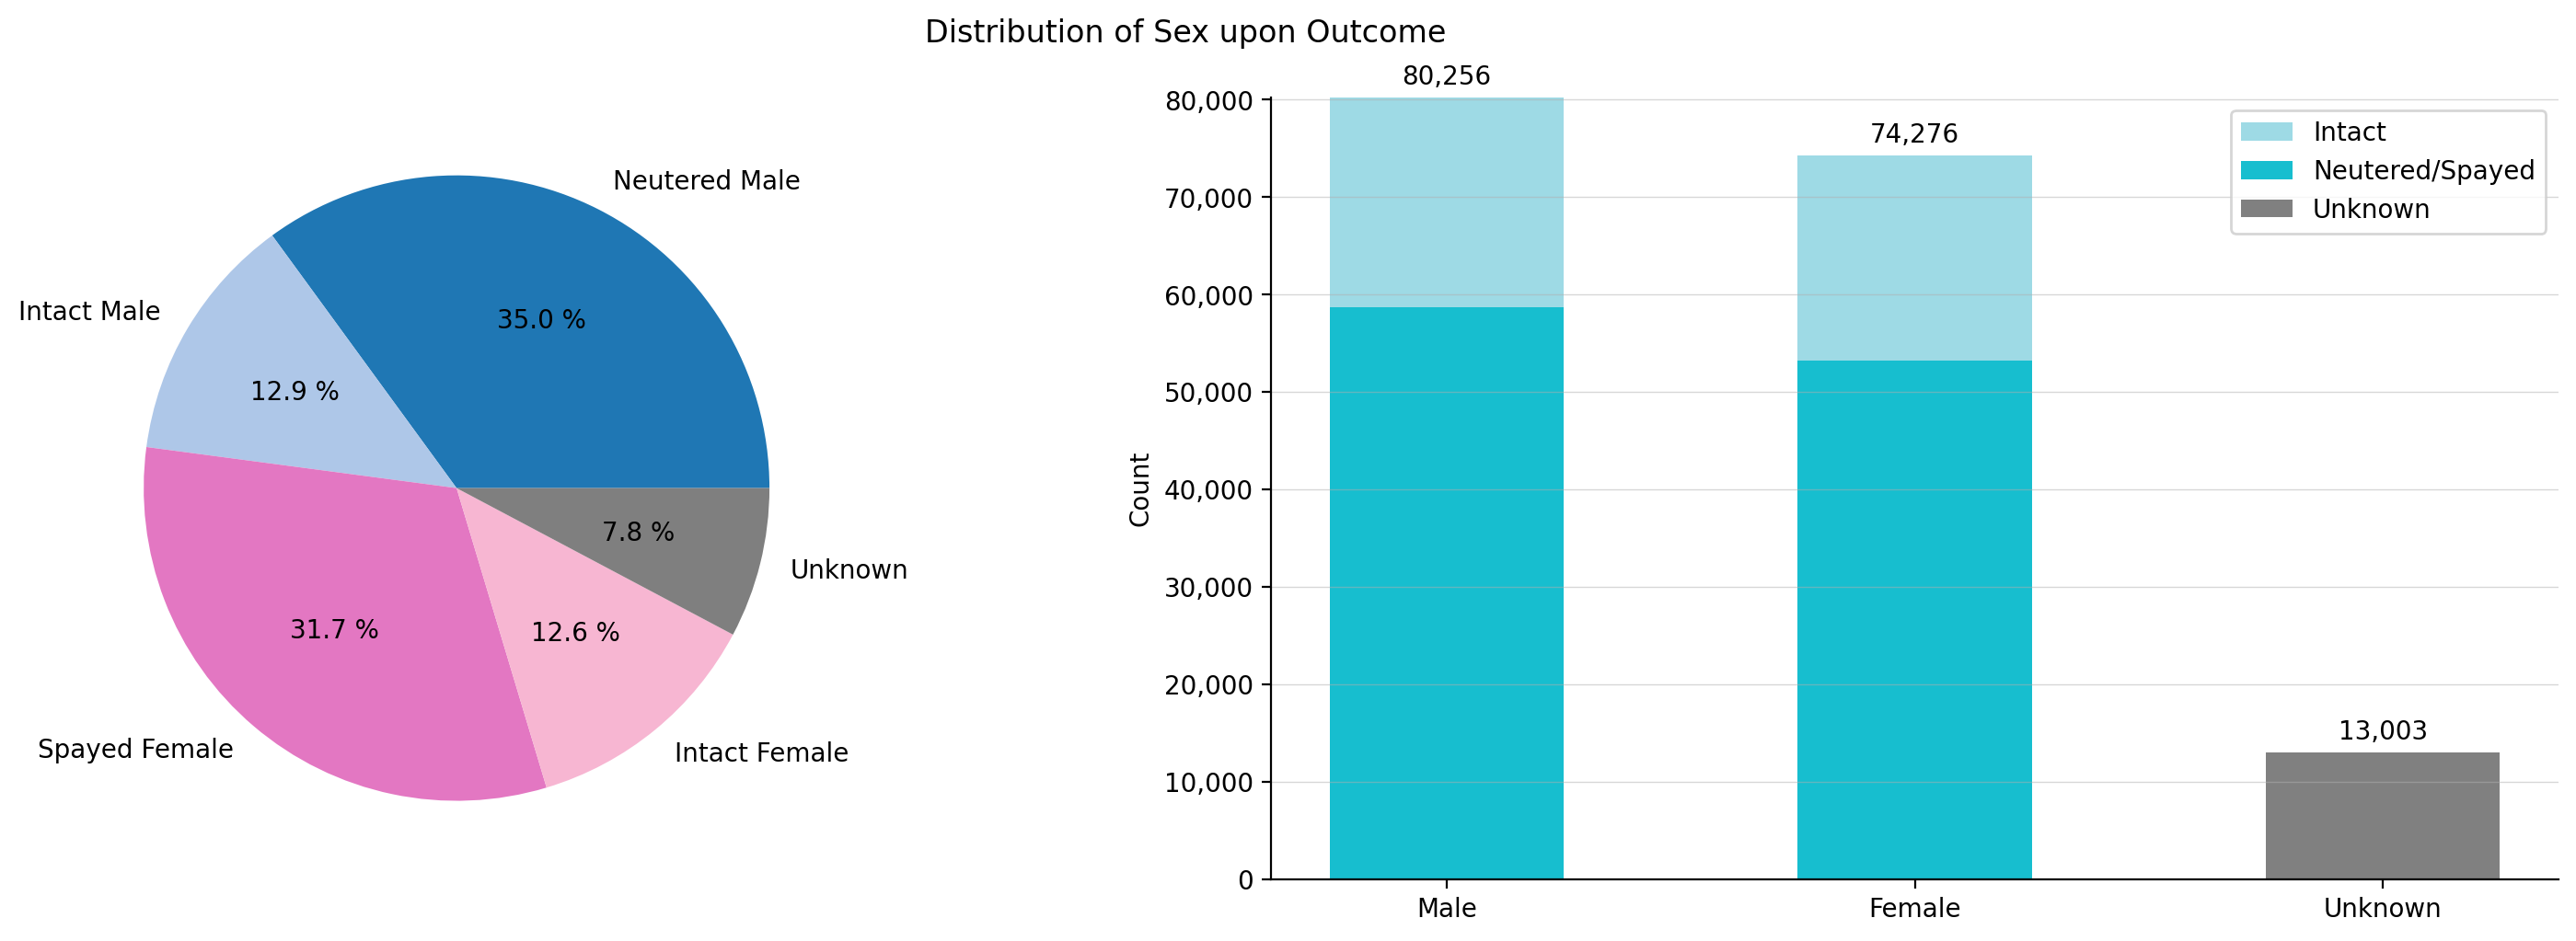

In [48]:
display(get_stats_df_categorical(outcomes, "Sex upon Outcome"))

sex_outcome_counts = outcomes["Sex upon Outcome"].value_counts()
sex_outcome_counts = sex_outcome_counts.iloc[[0, 2, 1, 3, 4]]
labels_type = ["Male", "Female", "Unknown"]

colors_all = plt.cm.tab20.colors
colors = [colors_all[x] for x in (0, 1, 12, 13, 14)]

neutered = pd.Series([sex_outcome_counts[0], sex_outcome_counts[2], 0], labels_type)
intact = pd.Series([sex_outcome_counts[1], sex_outcome_counts[3], 0], labels_type)
unknown = pd.Series([0, 0, sex_outcome_counts[4]], labels_type)

labels_counts = [format_with_commas(x) for x in neutered + intact + unknown]

fig = plt.figure(figsize=(15, 5), constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.suptitle("Distribution of Sex upon Outcome")

# Pie chart
ax1.pie(sex_outcome_counts, labels=sex_outcome_counts.index, autopct='%1.1f %%', colors=colors)

# Bar chart
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.bar(labels_type, intact, bottom=neutered, width=0.5, color=colors_all[19], label="Intact")
ax2.bar(labels_type, neutered, width=0.5, color=colors_all[18], label="Neutered/Spayed")
ax2.bar(labels_type, unknown, bottom=neutered+intact, width=0.5, color="gray", label="Unknown")
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
ax2.set_ylabel("Count")
ax2.grid(axis="y", alpha=0.5, linewidth=0.5)
ax2.legend()
ax2.bar_label(ax2.containers[2], padding=3, labels=labels_counts);

Vidíme, že útulek opustilo přes 80 tisíc samců a skoro 75 tisíc samic. U obou pohlaví je téměř třikrát více vykastrovaných jedinců než nevykastrovaných. U 13 tisíc zvířat neznáme jejich pohlaví a/nebo stav kastrace.

## Je nějaký vztah mezi *Outcome Type* a *Animal Type*?

Pojďme prozkoumat, jestli je nějaký vztah mezi typem odchodu a druhem zvířete.

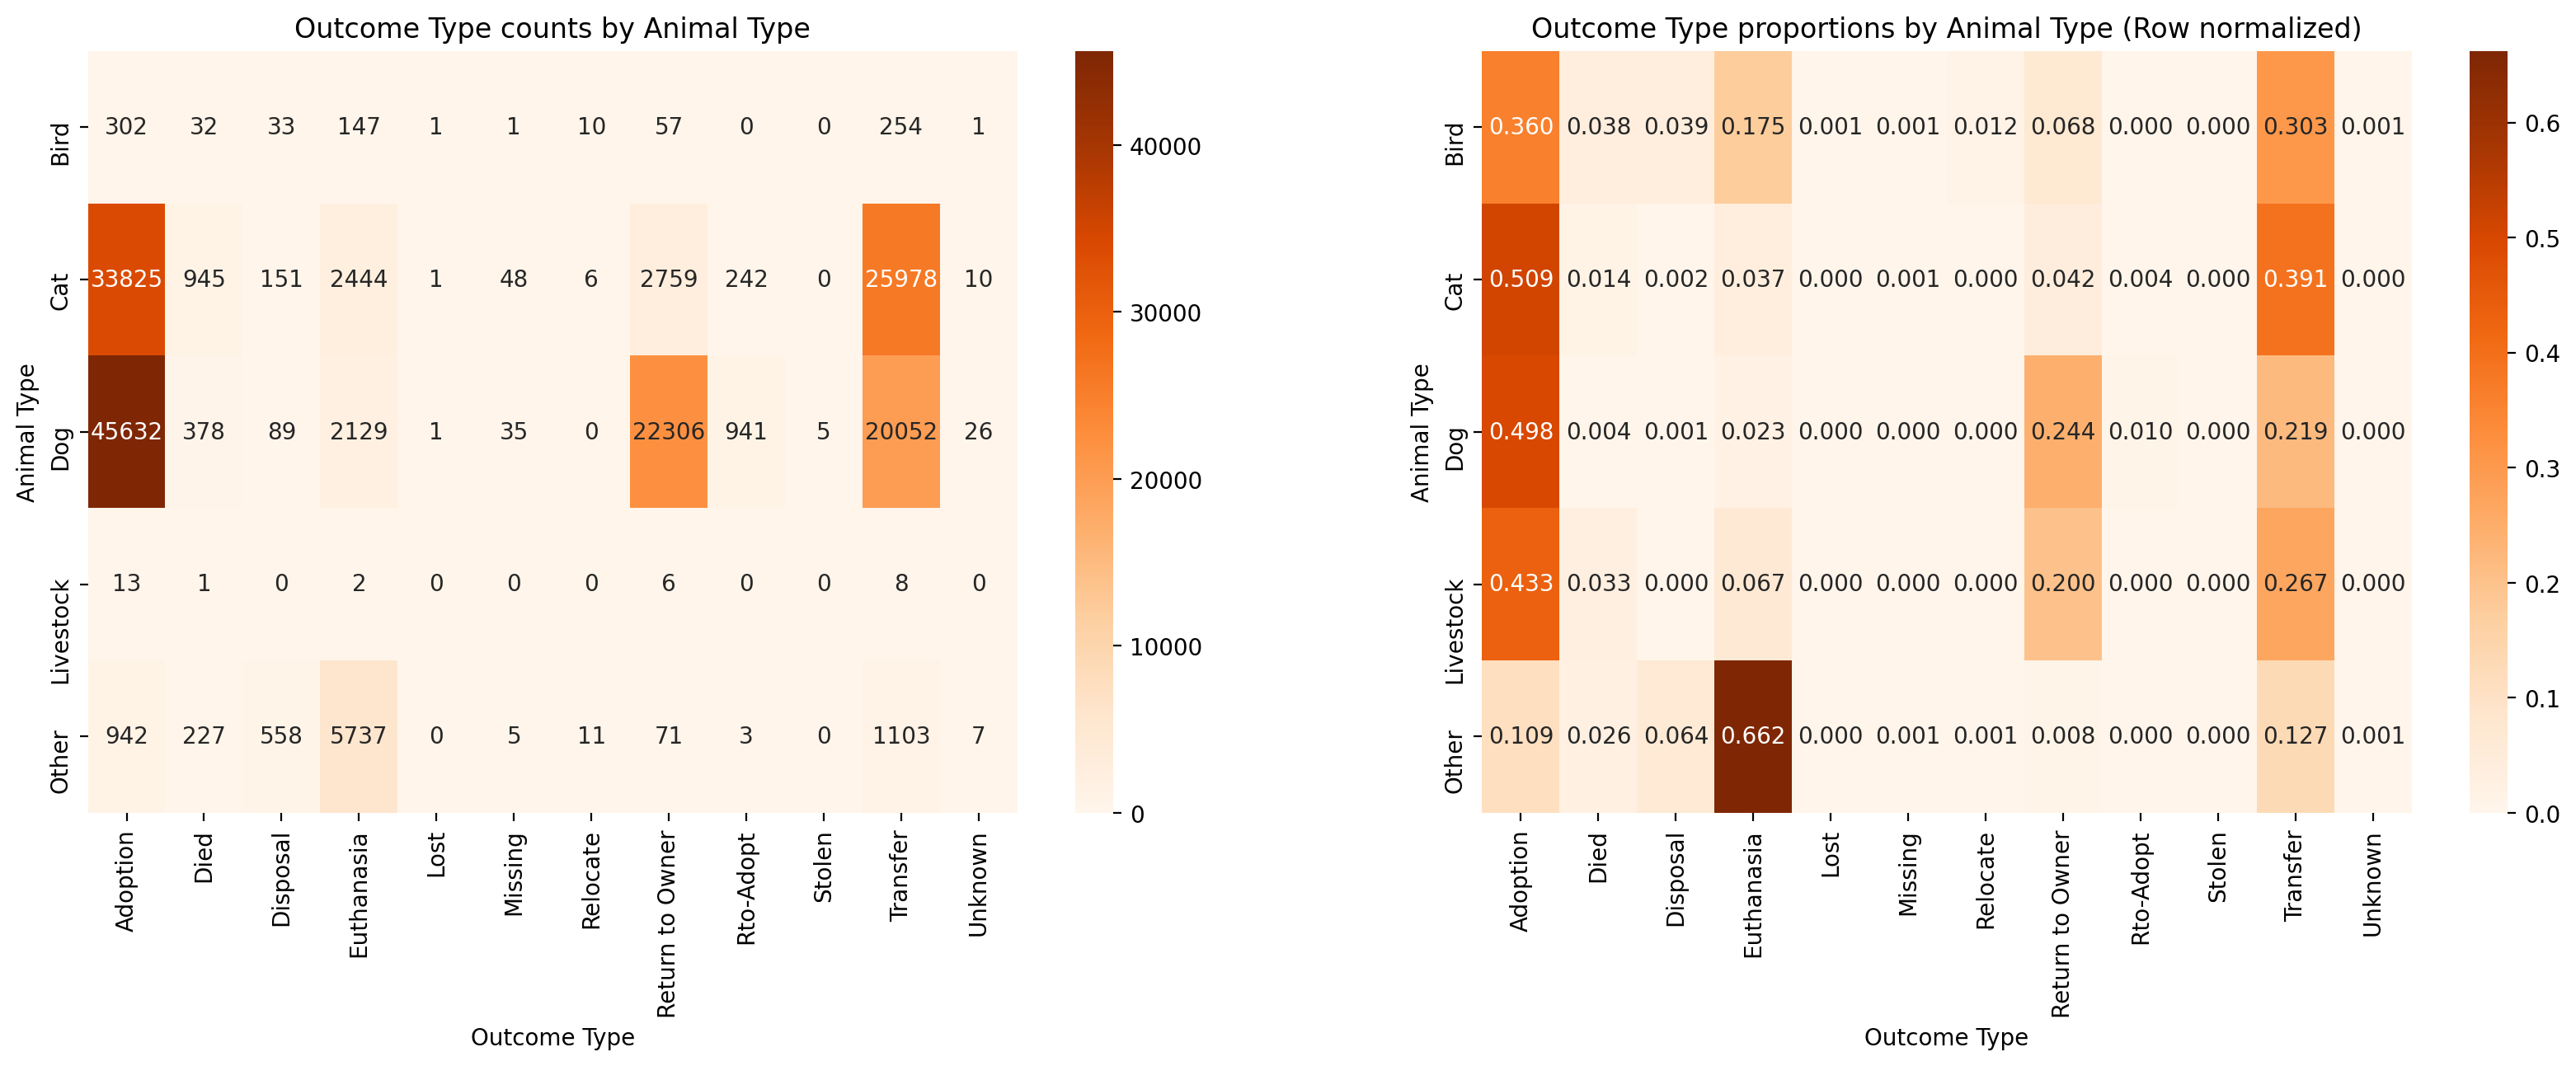

In [49]:
crosstab = pd.crosstab(outcomes["Animal Type"], outcomes["Outcome Type"])
crosstab_normalized = pd.crosstab(outcomes["Animal Type"], outcomes["Outcome Type"], normalize="index")

fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Outcome Type counts by Animal Type")
ax2.set_title("Outcome Type proportions by Animal Type (Row normalized)")
sns.heatmap(crosstab, annot=True, cmap="Oranges", fmt="g", ax=ax1)
sns.heatmap(crosstab_normalized, annot=True, cmap="Oranges", fmt=".3f", ax=ax2);

V levé tabulce jsou vyobrazeny počty druhů zvířat a jejich typů odchodů. Jelikož je nejvíce psů a koček, nejde toho z tabulky tolik vyčíst, protože řádky odpovídající jiným zvířatům jsou velmi světlé. Proto jsem udělal i druhou tabulku, ve které je vidět relativní zastoupení jednotlivých důvodů odchodu pro každý druh zvířat. Vidíme, že pro ptáky, kočky, psy a hospodářská zvířata je nejčastějším důvodem odchodu adopce. Pro zvířata z kategorie ostatní je to eutanazie. Eutanazie ještě proběhla u zhruba jedné šestiny ptáků, u zbylých druhů není častá. Ke svému majiteli se vrátila pětina hospodářských zvířat a téměř čtvrtina psů, zbylé druhy téměř vůbec. Ještě si můžeme všimnout, že převoz do jiného útulku je poměrně častý pro všechny druhy.

# Otázky

## Závislost *Outcome Type* na *Intake Type*

Podívejme se, jestli typ odchodu zvířete nějak závisí na typu příchodu zvířete. Budu uvažovat pouze zvířata, která jsou v každém datasetu právě jednou. Dataframy spojím na základě *Animal ID* a budou mi stačit pouze příznaky *Outcome Type* a *Intake Type*.

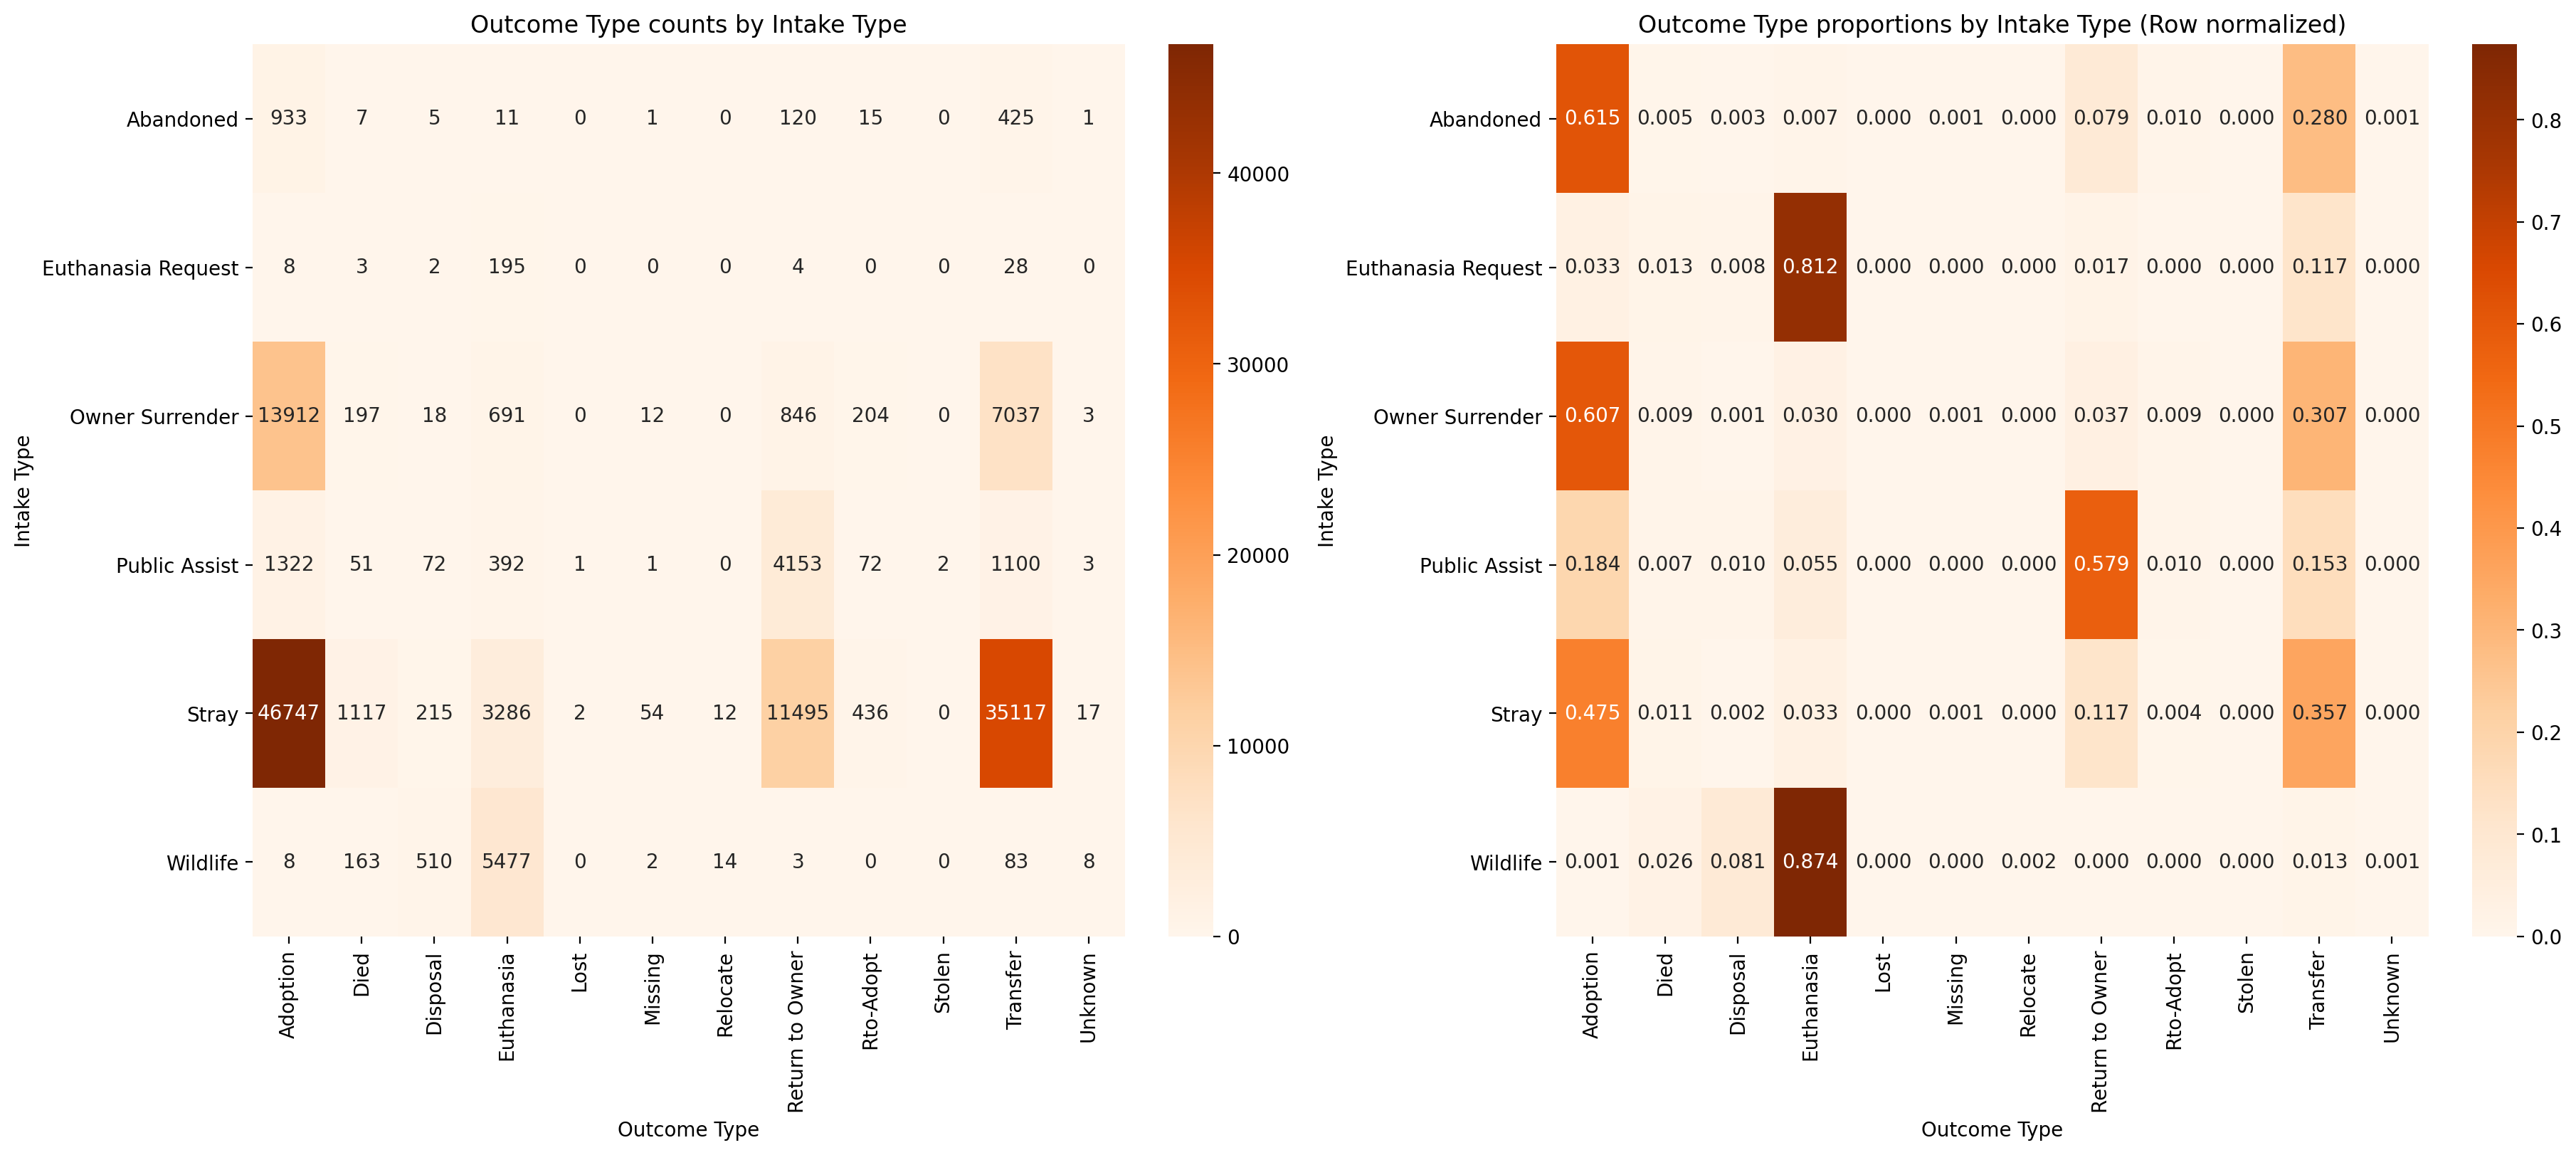

In [50]:
unique_intakes = intakes[~ intakes["Animal ID"].duplicated(keep=False)][["Animal ID", "Intake Type"]]
unique_outcomes = outcomes[~ outcomes["Animal ID"].duplicated(keep=False)][["Animal ID", "Outcome Type"]]
unique_animals = unique_intakes.merge(unique_outcomes, on="Animal ID")

crosstab = pd.crosstab(unique_animals["Intake Type"], unique_animals["Outcome Type"])
crosstab_normalized = pd.crosstab(unique_animals["Intake Type"], unique_animals["Outcome Type"], normalize="index")

fig = plt.figure(figsize=(18, 8), constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Outcome Type counts by Intake Type")
ax2.set_title("Outcome Type proportions by Intake Type (Row normalized)")
sns.heatmap(crosstab, annot=True, cmap="Oranges", fmt="g", ax=ax1)
sns.heatmap(crosstab_normalized, annot=True, cmap="Oranges", fmt=".3f", ax=ax2);


Vidíme, že jistá závislost Outcome Type na Intake Type skutečně je. 81.2 % zvířat, která přišla do útulku s žádostí o eutanazii, bylo usmrceno, to dává smysl. Eutanazie je nejčastější důvod odchodu i u divokých zvířat, konkrétně 87.4 % divokých zvířat bylo usmrceno. Zvířata, s jejichž záchranou pomáhala veřejnost, se z 57.9 % vrátila zpět k majiteli. U zbylých tří typů příchodu (opuštěná zvířata, majitel odevzdal zvíře sám, zatoulaná zvířata) je nejčastějším typem odchodu adopce následovaná převezením.

## Hraje věk zvířete roli při adopci?

,Age of Adopted animals [years],Age of Non-Adopted animals [years]
Min,0.000000,0.000000
Max,20.000000,30.000000
Average,1.414082,2.298635
25%,0.000000,0.000000
Median,0.000000,1.000000
75%,2.000000,3.000000


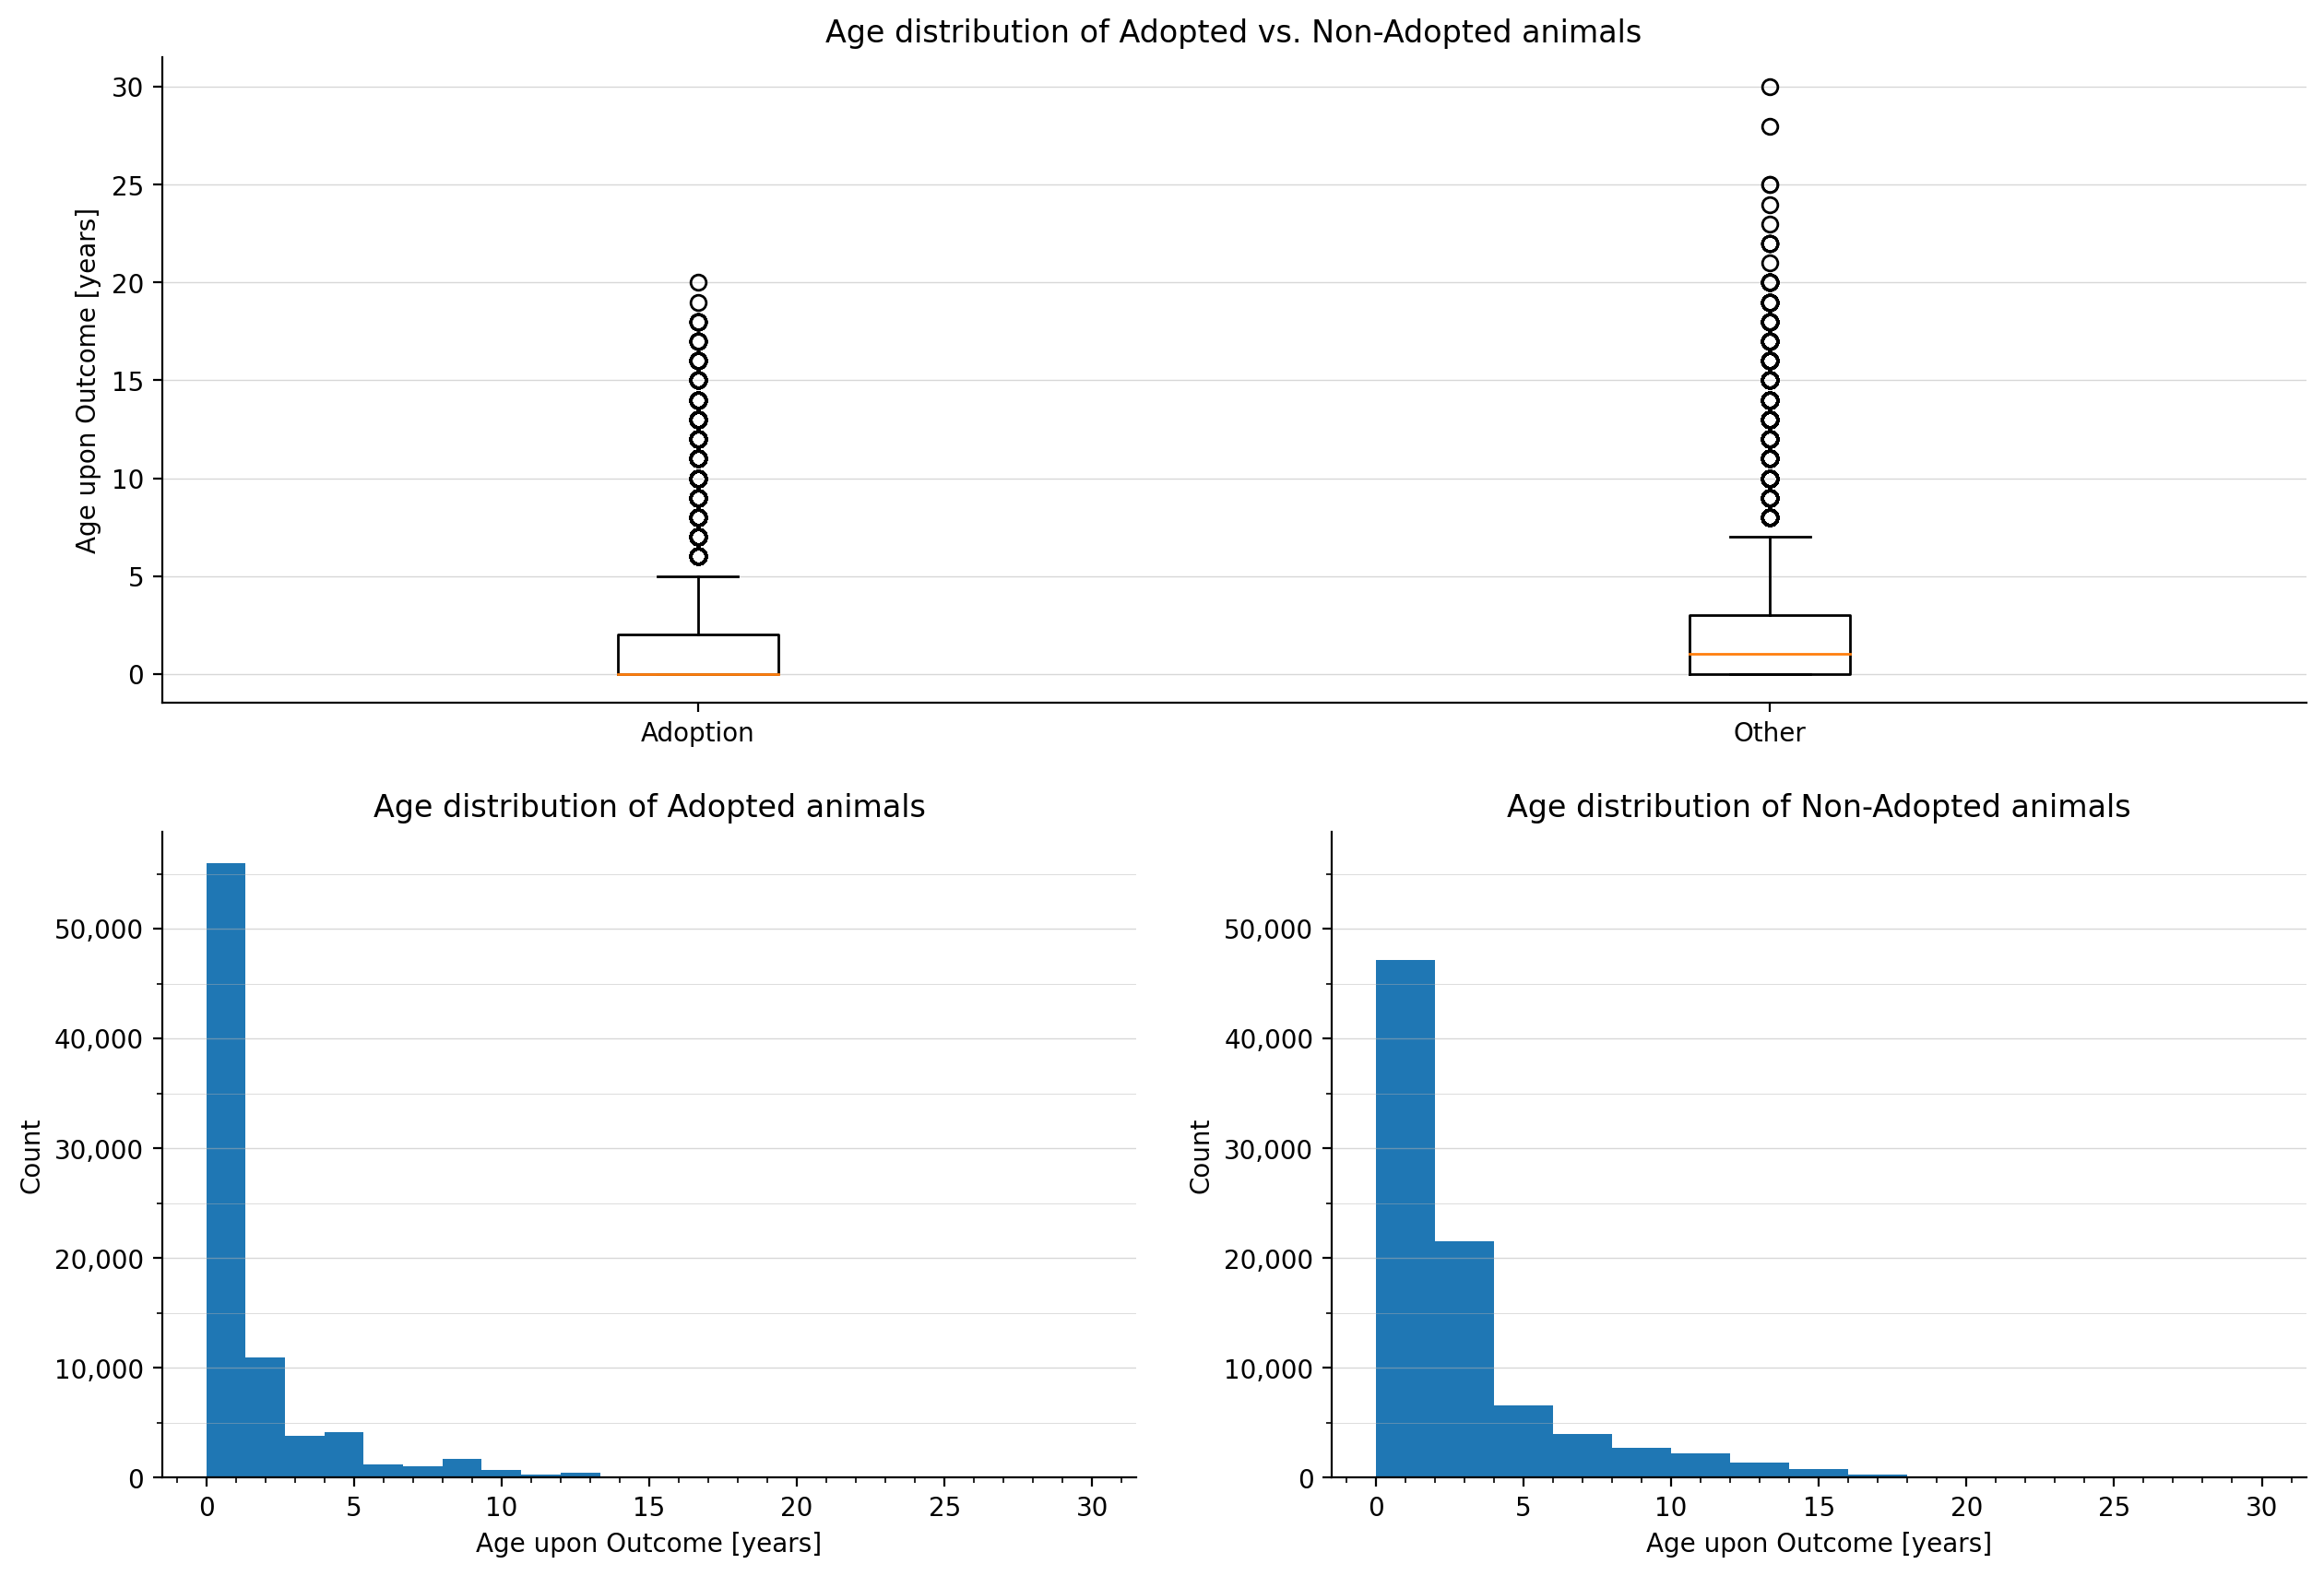

In [51]:
def age_histplot(series, ax):
    ax.hist(series, bins=15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(5000))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
    ax.grid(axis="y", alpha=0.5, linewidth=0.5)
    ax.grid(axis="y", which="minor", alpha=0.5, linewidth=0.3)
    ax.set_ylabel("Count")
    ax.set_xlabel("Age upon Outcome [years]")

adopted = outcomes[outcomes["Outcome Type"] == "Adoption"]
other = outcomes[outcomes["Outcome Type"] != "Adoption"]

labels = ["Adoption","Other"]
data = [
    adopted["AgeOutcomeYears"].dropna(),
    other["AgeOutcomeYears"].dropna(),
]

adopted_stats = get_stats_df_numerical(adopted, ["AgeOutcomeYears"], ["Age of Adopted animals [years]"])
other_stats = get_stats_df_numerical(other, ["AgeOutcomeYears"], ["Age of Non-Adopted animals [years]"])
stats = pd.concat([adopted_stats, other_stats], axis=1)
display(stats)

fig = plt.figure(figsize=(15, 10))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0, :])
ax2 = fig.add_subplot(spec[1, 0])
ax3 = fig.add_subplot(spec[1, 1])

# Boxplots
ax1.boxplot(data, labels=labels)
ax1.set_ylabel("Age upon Outcome [years]")
ax1.set_title("Age distribution of Adopted vs. Non-Adopted animals")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.grid(axis="y", alpha=0.5, linewidth=0.5)

# Histograms
age_histplot(data[0], ax2)
age_histplot(data[1], ax3)
xlim = ax3.get_xlim()
ylim = ax2.get_ylim()
ax2.set_xlim(xlim)
ax3.set_ylim(ylim)
ax2.set_title("Age distribution of Adopted animals")
ax3.set_title("Age distribution of Non-Adopted animals");

Vidíme, že věk zvířete skutečně roli hraje. Lidé si raději adoptují mladší zvířata. Medián věku adoptovaných zvířat je 0 let a průměr 1.4 roku, u neadoptovaných zvířat je medián 1 rok a průměr 2.3 roku. Nejstaršímu adoptovanému zvířeti bylo 20 let, neadoptovanému 30 let.

## Je příjem zvířat v rámci roku konstantní?

Datum prvního příjmu: 01 Oct 2013
Datum posledního příjmu: 06 Oct 2024


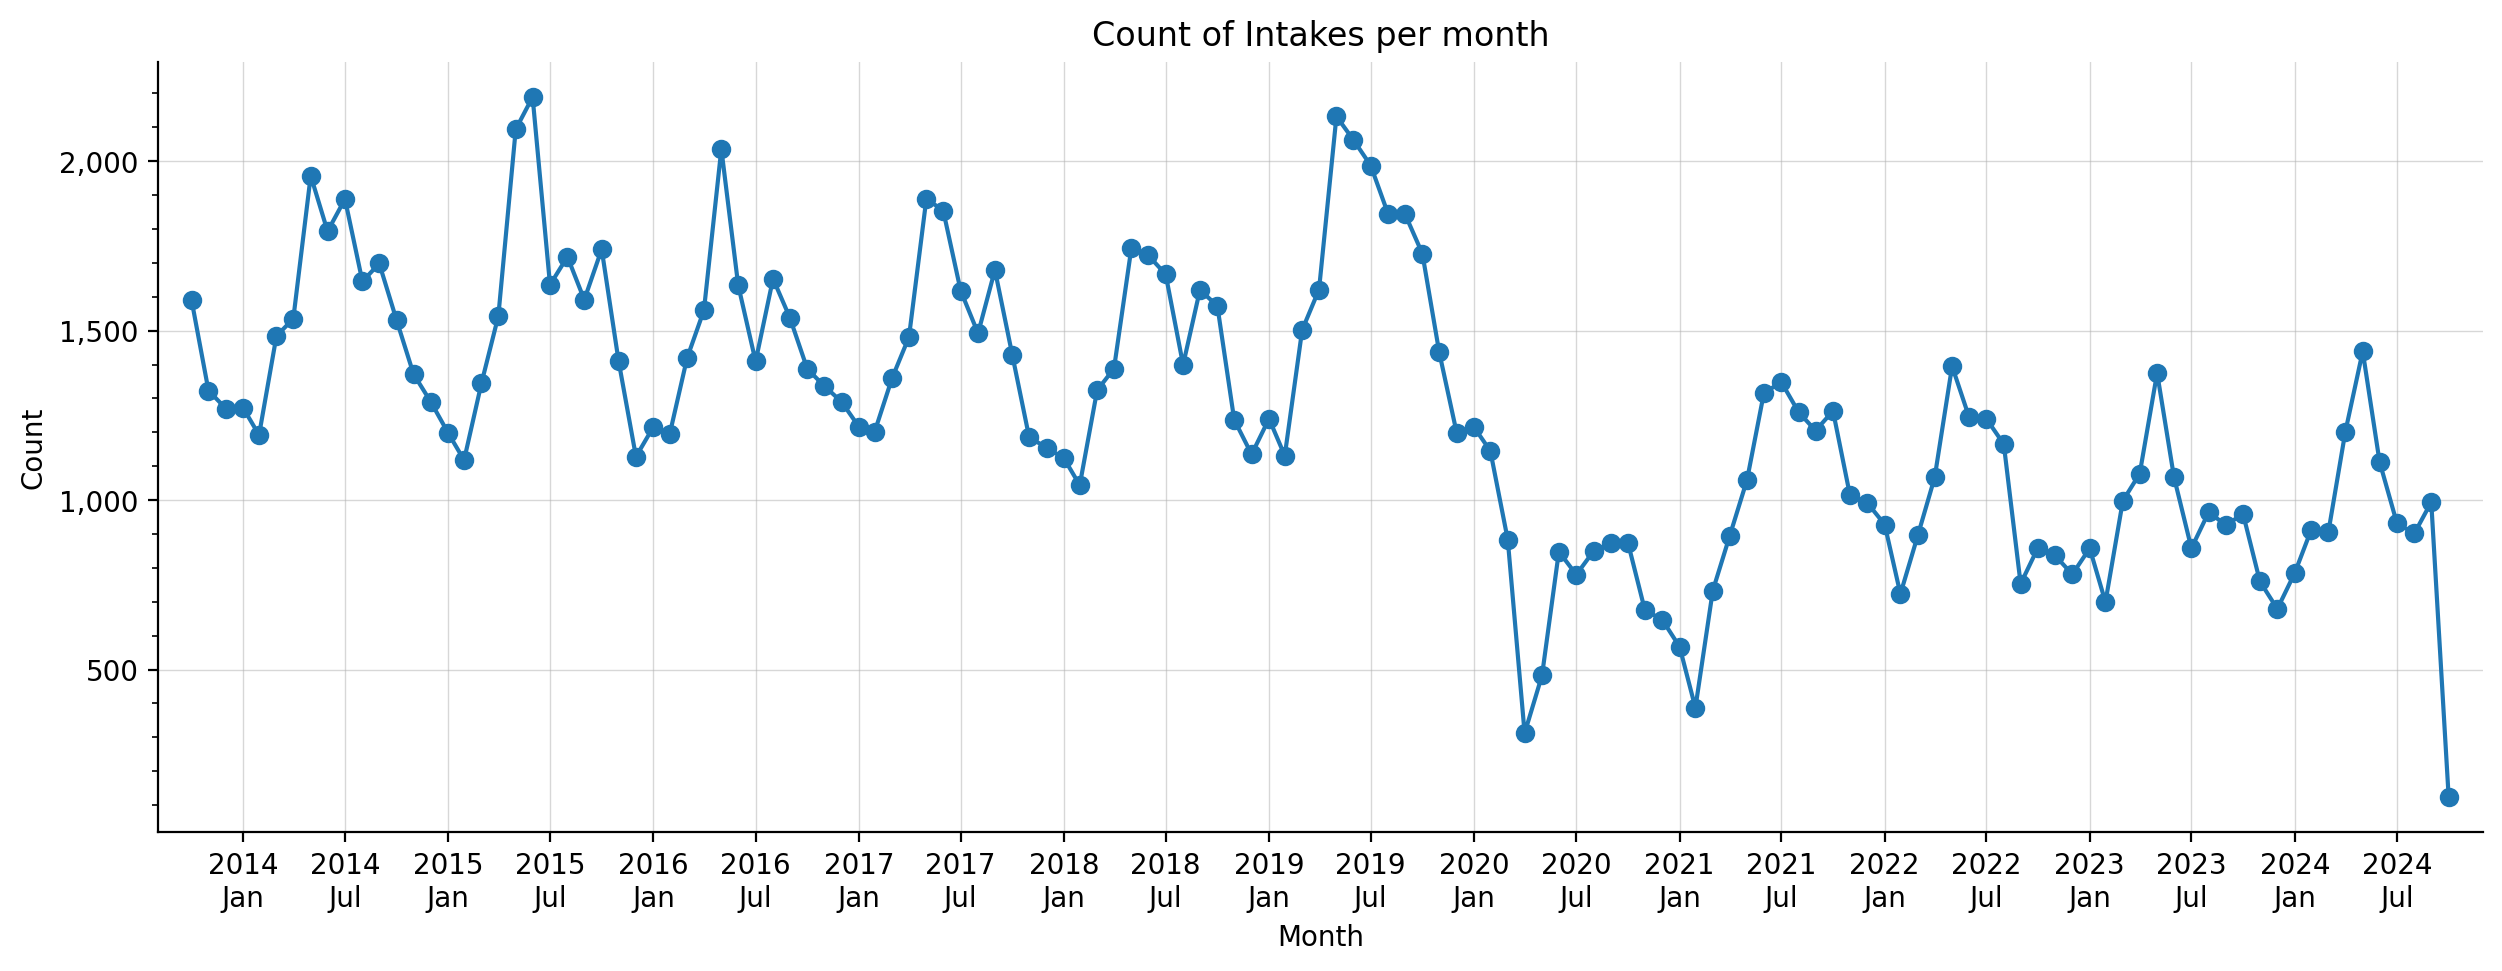

In [52]:
intakes_per_month = intakes.resample("M", on="DateTime").size()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(intakes_per_month.index, intakes_per_month, marker="o")

ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7), bymonthday=-1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y\n%b"))
ax.set_xlim(pd.to_datetime("2013-09-01"), pd.to_datetime("2024-12-31"))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="x", alpha=0.5, linewidth=0.5)
ax.grid(axis="y", alpha=0.5, linewidth=0.5)
ax.set_ylabel("Count")
ax.set_xlabel("Month")
ax.set_title("Count of Intakes per month")

print("Datum prvního příjmu:", intakes["DateTime"].sort_values().iloc[0].strftime("%d %b %Y"))
print("Datum posledního příjmu:", intakes["DateTime"].sort_values().iloc[-1].strftime("%d %b %Y"))

Příjem zvířat není v rámci roku konstantní. Nejvíce zvířat útulek pravidelně přijímá na přelomu jara a léta (květen, červen) a nejméně na začátku roku (leden, únor, březen). Výjimkou je rok 2020, od kterého však útulek přijímá obecně méně zvířat vzhledem k předchozím letem, ale to už víme. Všimněme si, že v posledním měsíci (říjen 2024) bylo přijato málo zvířat, to je způsobené tím, že v datasetu je poslední zaznamenaný příjem 6. 10. 2024, tedy chybí 25 dní z tohoto měsíce.

## Odchází více vykastrovaných zvířat, než přichází?

Čekal bych, že z útulku bude odcházet více vykastrovaných zvířat, než do něj přichází. Pojďme zjistit, jestli to je pravda.

Intakes                     Outcomes                   
              Frequency Relative Frequency Frequency Relative Frequency
Intact Male       56720           0.338578     21568           0.128737
Intact Female     54415           0.324819     21103           0.125962
Neutered Male     23574           0.140720     58688           0.350303
Spayed Female     19781           0.118079     53173           0.317384
Unknown           13034           0.077804     13003           0.077614

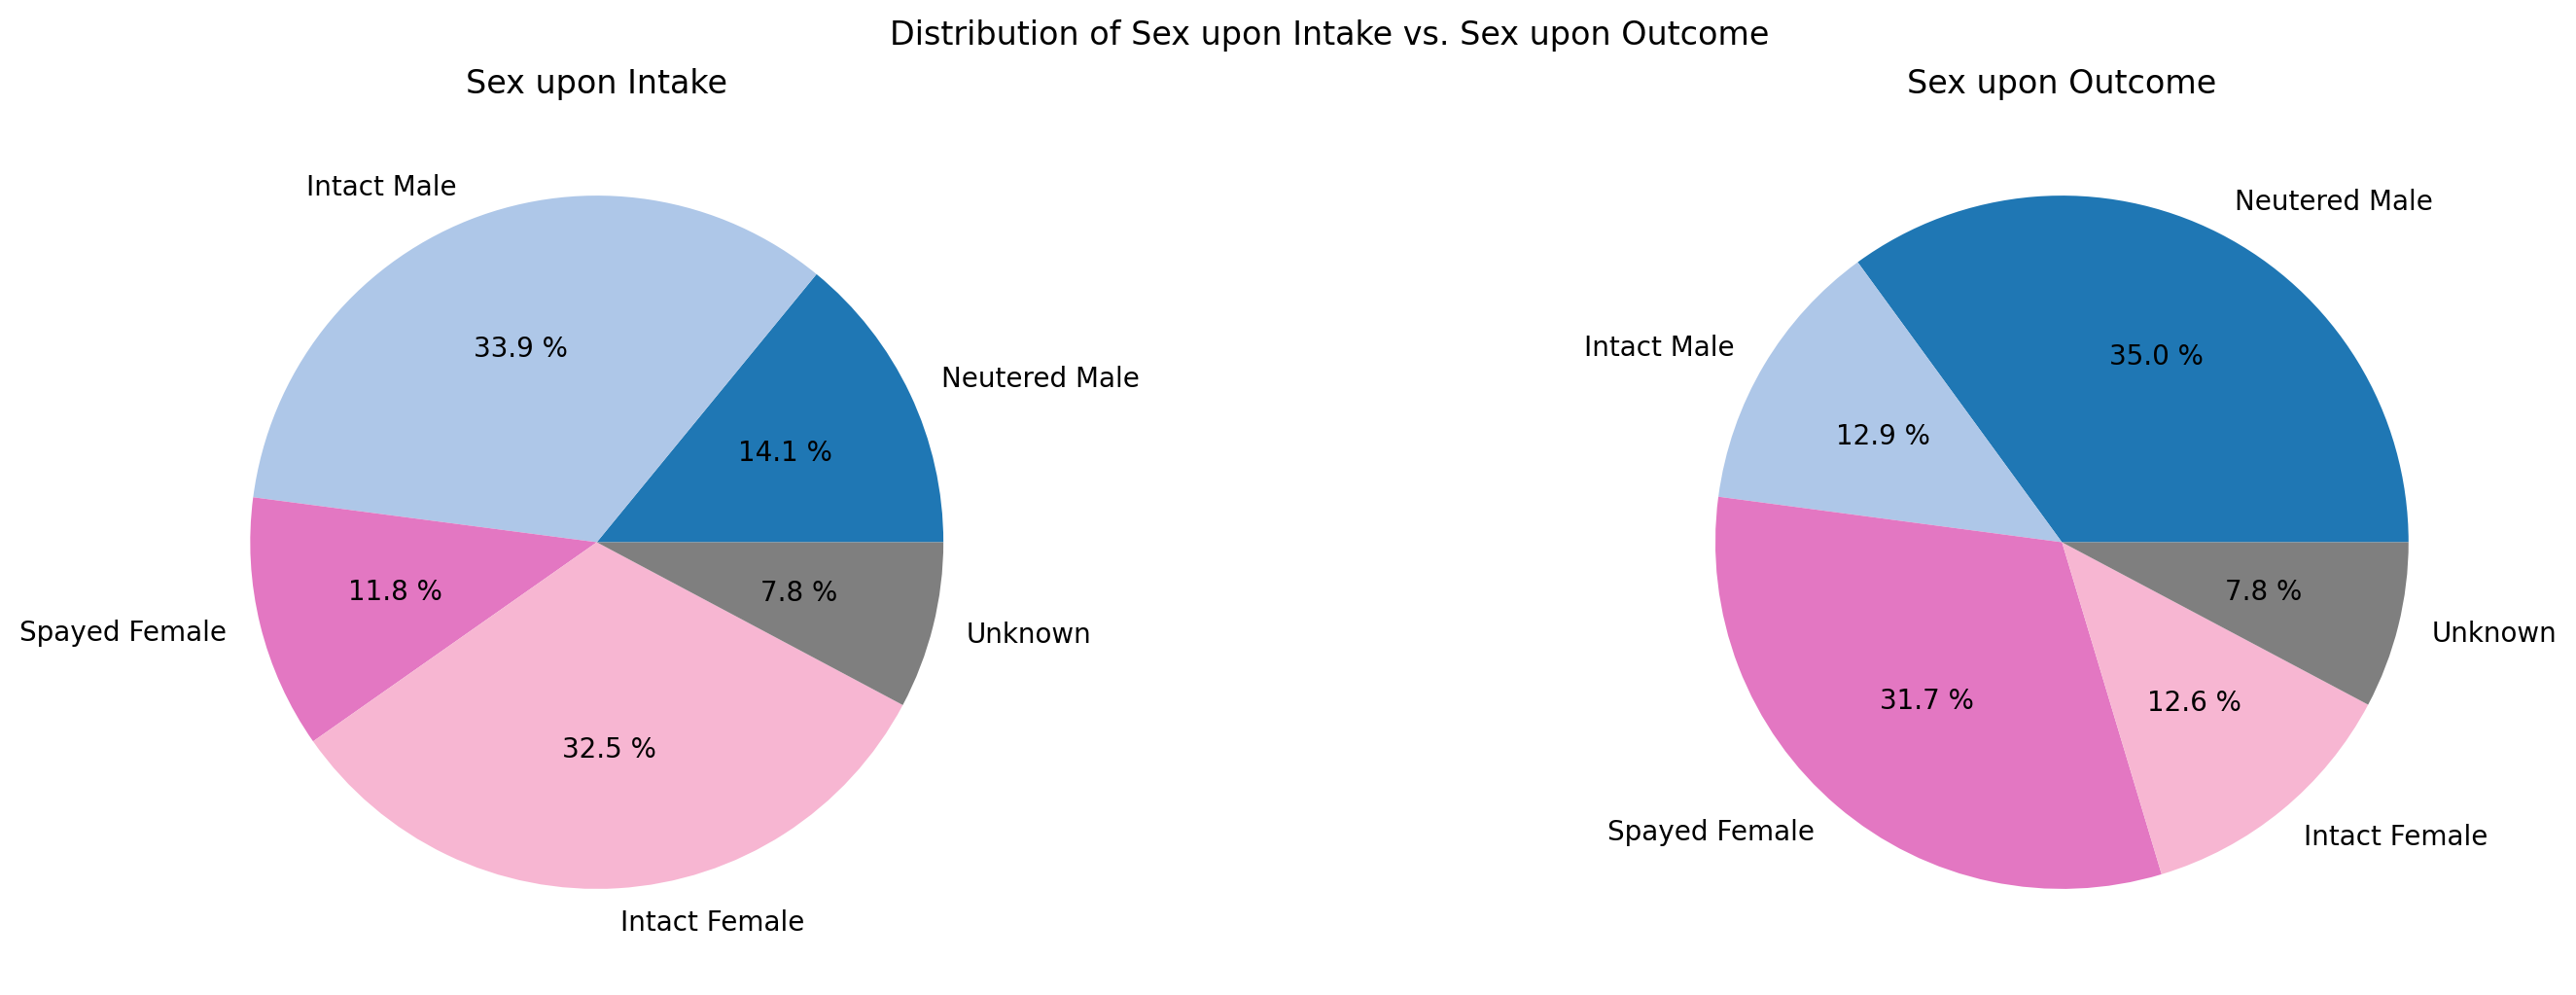

In [53]:
intake_sex = get_stats_df_categorical(intakes, "Sex upon Intake")
outcome_sex = get_stats_df_categorical(outcomes, "Sex upon Outcome")
stats = pd.concat([intake_sex, outcome_sex], axis=1)
stats.columns = pd.MultiIndex.from_tuples([
    ("Intakes", "Frequency"), ("Intakes", "Relative Frequency"),
    ("Outcomes", "Frequency"), ("Outcomes", "Relative Frequency"),
])
display(stats)

sex_outcome_counts = outcomes["Sex upon Outcome"].value_counts()
sex_outcome_counts = sex_outcome_counts.iloc[[0, 2, 1, 3, 4]]

sex_intake_counts = intakes["Sex upon Intake"].value_counts()
sex_intake_counts = sex_intake_counts.iloc[[2, 0, 3, 1, 4]]

colors_all = plt.cm.tab20.colors
colors = [colors_all[x] for x in (0, 1, 12, 13, 14)]

fig = plt.figure(figsize=(15, 5), constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.suptitle("Distribution of Sex upon Intake vs. Sex upon Outcome")

ax1.set_title("Sex upon Intake")
ax1.pie(sex_intake_counts, labels=sex_intake_counts.index, autopct='%1.1f %%', colors=colors);

ax2.set_title("Sex upon Outcome")
ax2.pie(sex_outcome_counts, labels=sex_outcome_counts.index, autopct='%1.1f %%', colors=colors);

Má domněnka se potvrdila. Do útulku přichází skoro 70 % nevykastrovaných a zhruba 25 % vykastrovaných zvířat. Pro odchody se tato procenta prohodila.

## Z jakých důvodů se provádí eutanazie?

,Frequency,Relative frequency
Rabies Risk,4713,0.463194
Suffering,3990,0.392138
Aggressive,604,0.059361
Medical,342,0.033612
At Vet,235,0.023096
Behavior,169,0.016609
Court/Investigation,85,0.008354
Underage,37,0.003636


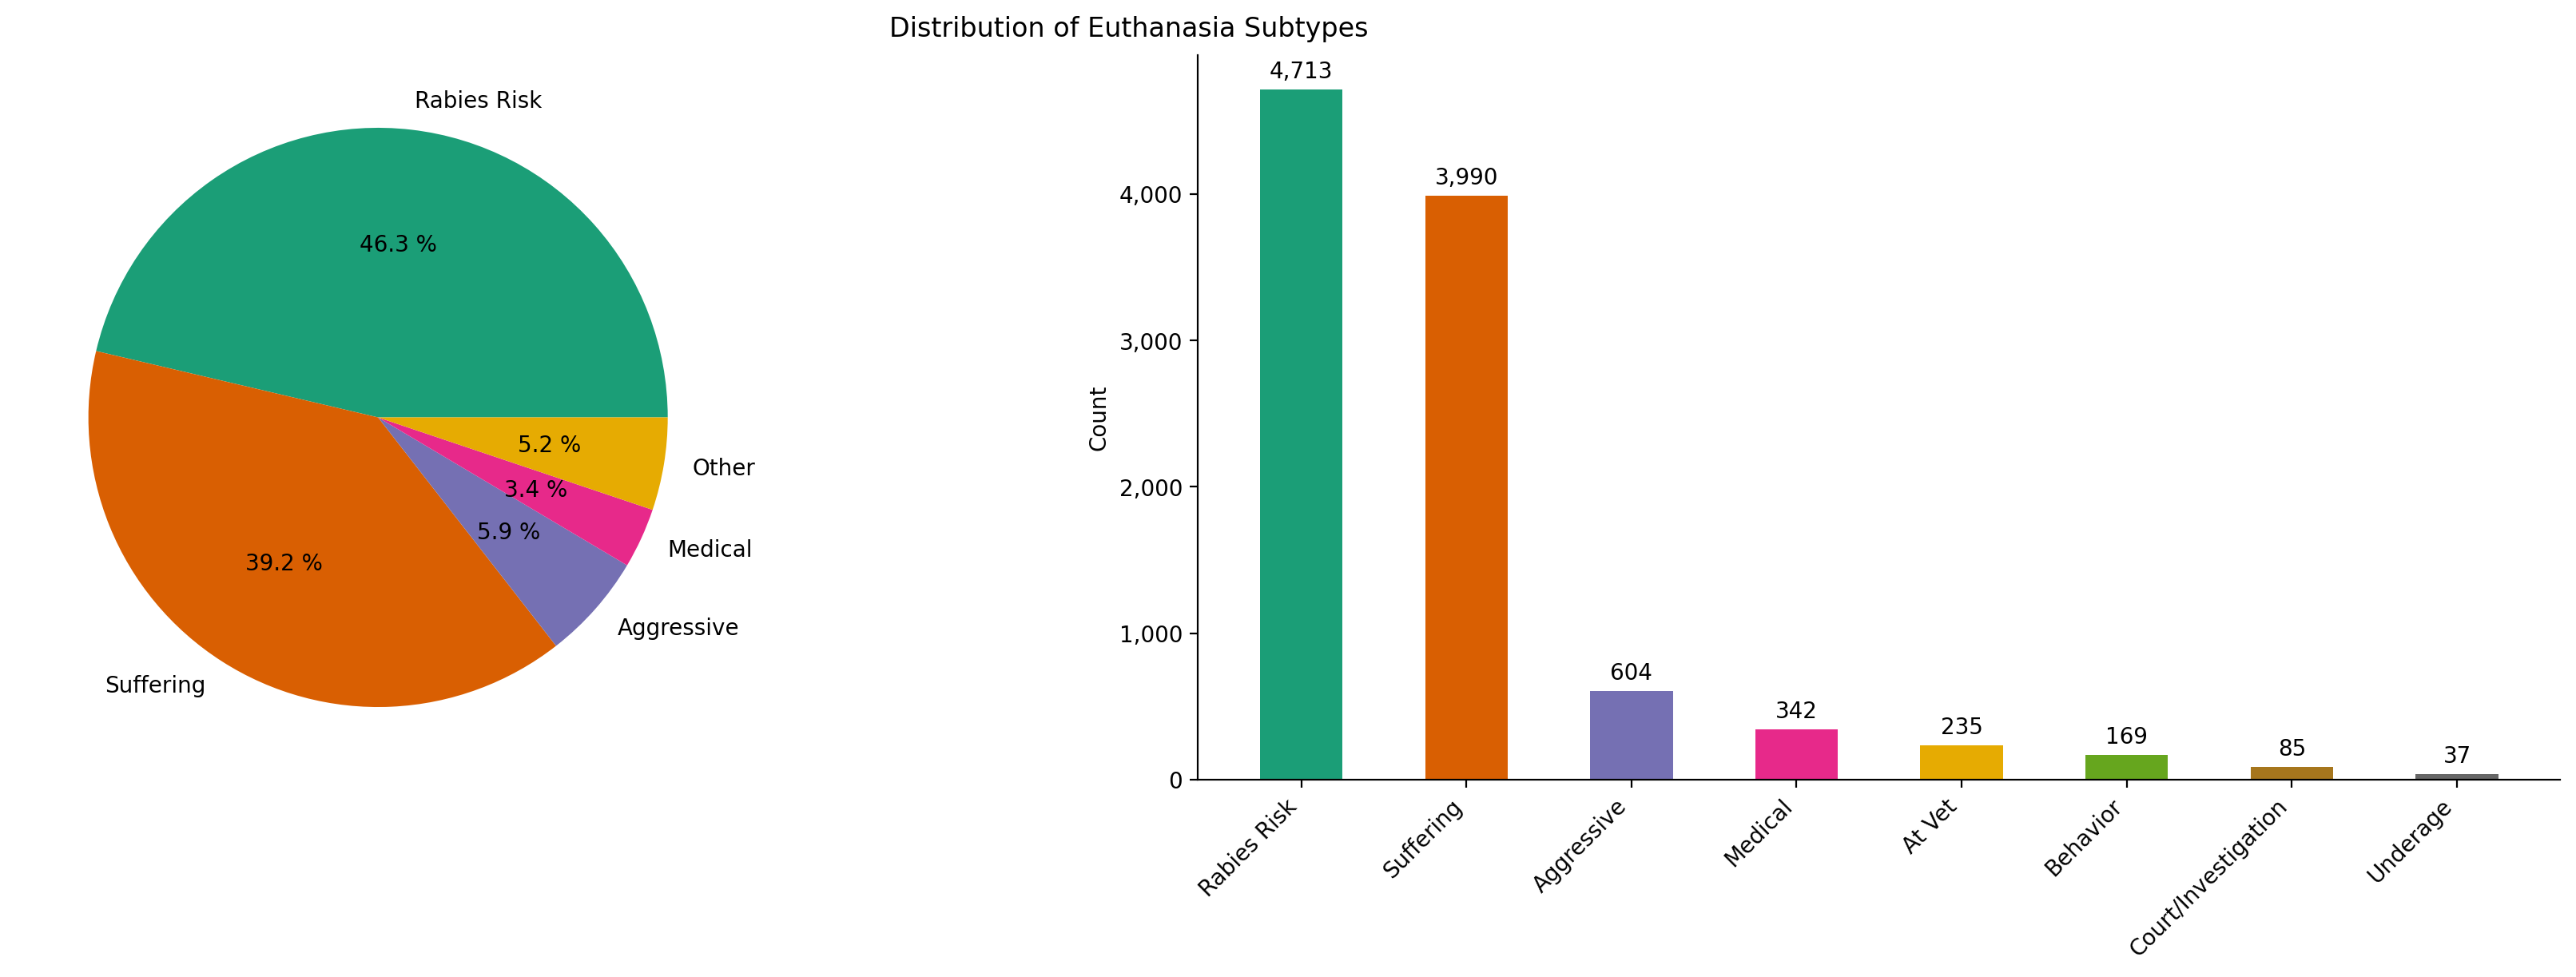

In [54]:
euthanasia = outcomes[(outcomes["Outcome Type"] == "Euthanasia") & (~ outcomes["Outcome Subtype"].isna())].copy()
euthanasia["Outcome Subtype"] = euthanasia["Outcome Subtype"].cat.remove_unused_categories()
eu_subtypes_all = euthanasia["Outcome Subtype"].value_counts()
eu_subtypes_top = eu_subtypes_all[:4]
eu_subtype_other = eu_subtypes_all[4:].sum()
eu_subtypes_top["Other"] = eu_subtype_other

colors = list(plt.cm.Dark2.colors)
colors[4], colors[5] = colors[5], colors[4]
labels = [format_with_commas(x) for x in eu_subtypes_all]

display(get_stats_df_categorical(euthanasia, "Outcome Subtype"))

fig = plt.figure(figsize=(18, 6), constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.suptitle("Distribution of Euthanasia Subtypes")

ax1.pie(eu_subtypes_top, labels=eu_subtypes_top.index, autopct='%1.1f %%', colors=colors)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.bar(eu_subtypes_all.index, eu_subtypes_all, width=0.5, color=colors)
for label in ax2.get_xticklabels():
    label.set(rotation=45, ha="right")
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
ax2.set_ylabel("Count")
ax2.bar_label(ax2.containers[0], padding=3, labels=labels);

Nejčastějším důvodem eutanazie je riziko vztekliny, na druhém místě je, že zvíře naživu trpí. Ostatní důvody nejsou příliš časté.

## Je nějaký vztah mezi pohlavím a stavem kastrace a typem odchodu?

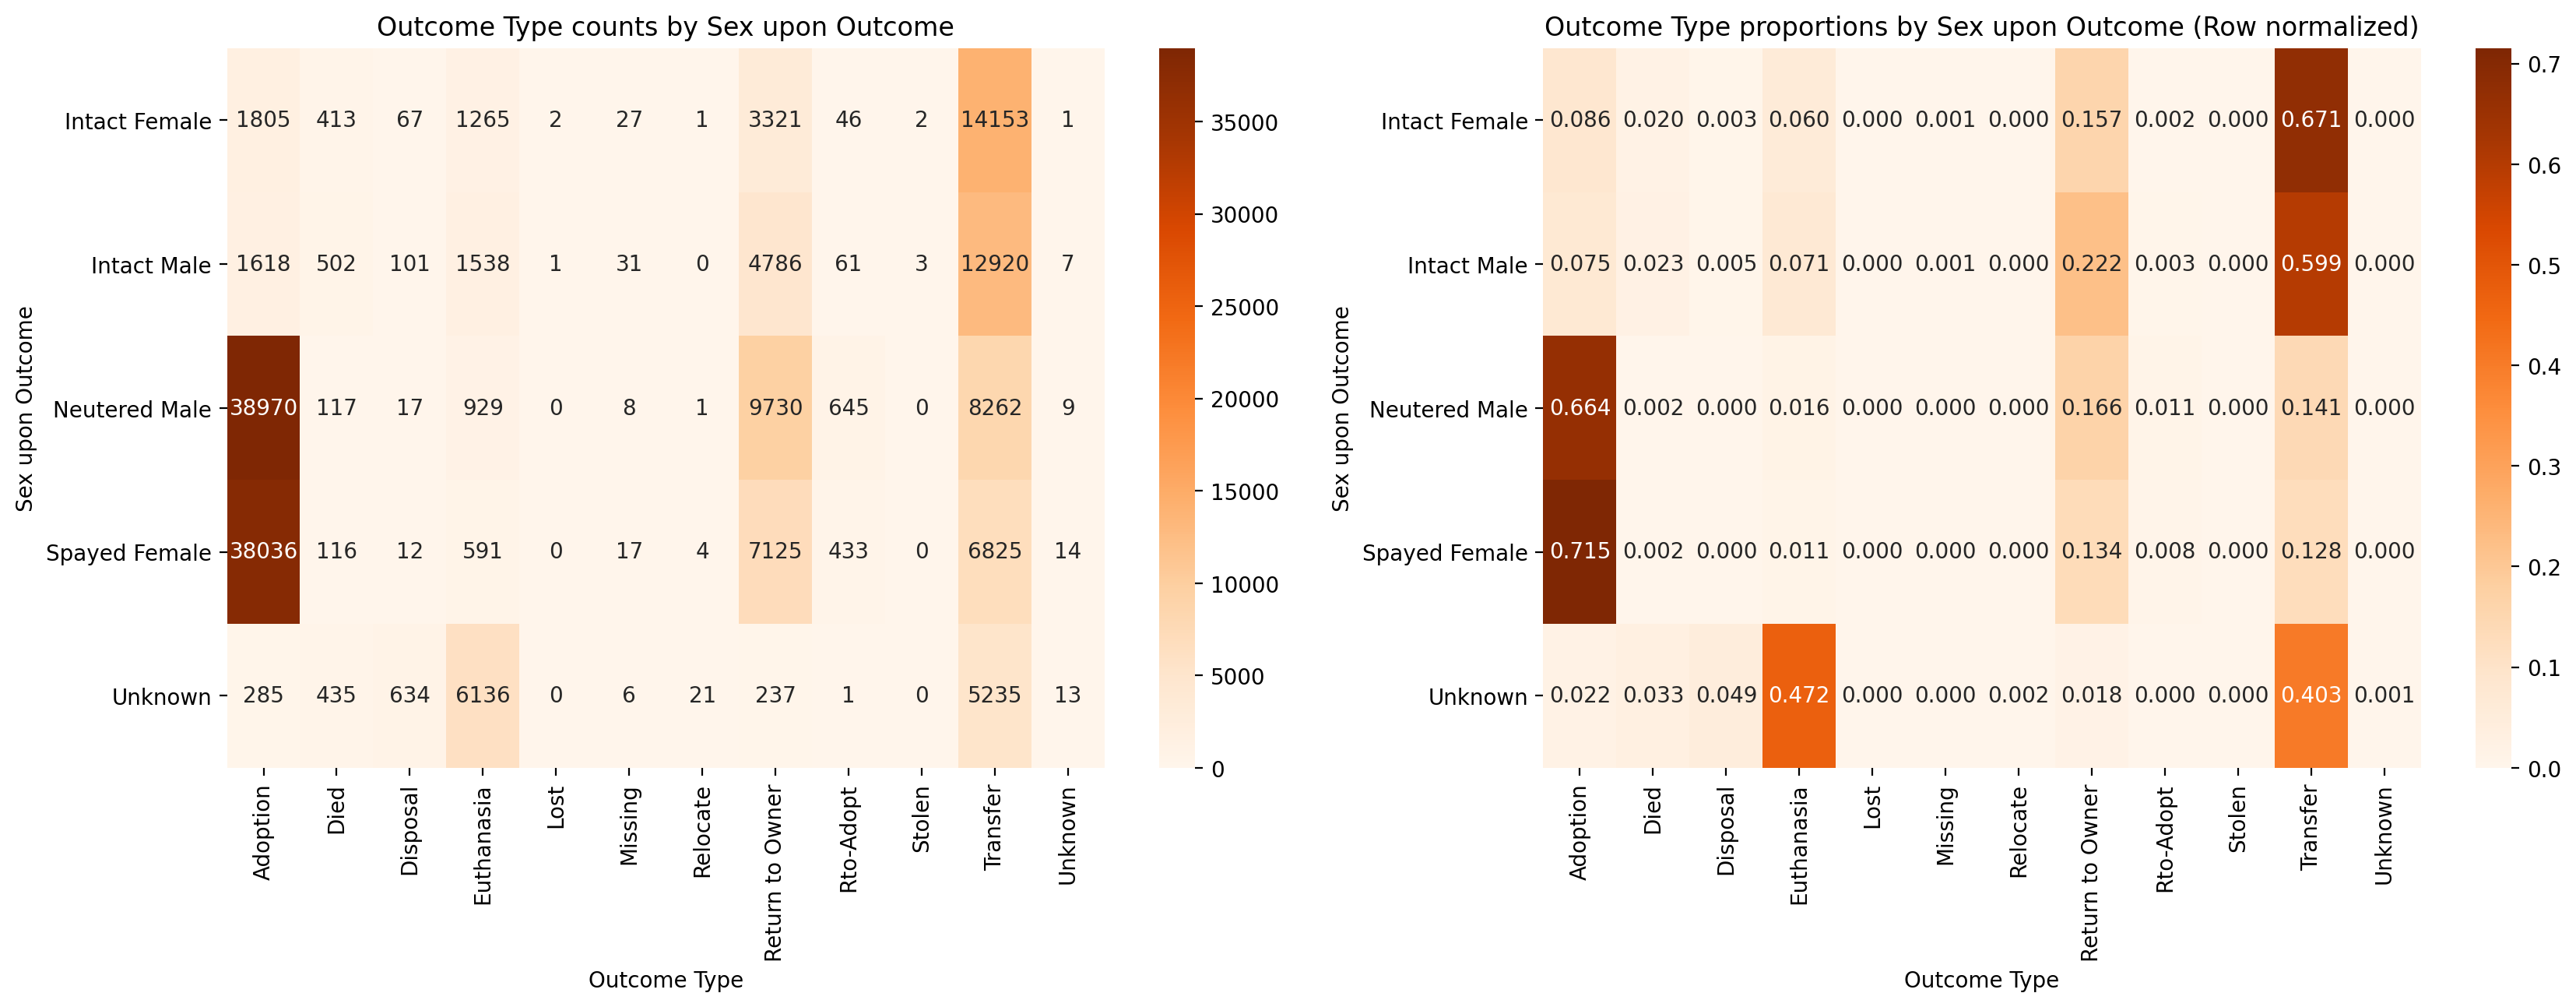

In [55]:
crosstab = pd.crosstab(outcomes["Sex upon Outcome"], outcomes["Outcome Type"])
crosstab_normalized = pd.crosstab(outcomes["Sex upon Outcome"], outcomes["Outcome Type"], normalize="index")

fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Outcome Type counts by Sex upon Outcome")
ax2.set_title("Outcome Type proportions by Sex upon Outcome (Row normalized)")
sns.heatmap(crosstab, annot=True, cmap="Oranges", fmt="g", ax=ax1)
sns.heatmap(crosstab_normalized, annot=True, cmap="Oranges", fmt=".3f", ax=ax2);

Jistý vztah mezi pohlavím a stavem kastrace a typem odchodu skutečně je. Většina vykastrovaných jedinců je adoptována, zatímco většina nevykastrovaných jedinců je převezena. Zvířata, u kterých neznáme pohlaví a stav kastrace, jsou ze 47 % usmrcena a ze 40 % převezena.

# Závěr

Připravil jsem si datasety a odpověděl na otázky. Vyzkoušel jsem si různé druhy vizualizace. Některé informace byly poněkud očekávatelné, ale našly se i takové, které mě překvapily.